# Исследование объявлений о продаже квартир

## Описание проекта

<b>Цель исследования</b> - установить параметры, влияющие на рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

<b>Исходные данные</b> - данные сервиса «Яндекс.Недвижимость» (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет).

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<b>Вопросы, интересующие заказчика</b>:

- Сколько времени занимает продажа квартиры. Какую продажу можно назвать быстрой/долгой.
- Какие факторы больше всего влияют на общую (полную) стоимость объекта, проанализируйте на графиках зависимости цены от:
    - общей площади;
    - жилой площади;
    - площади кухни;
    - количества комнат;
    - этажа, на котором расположена квартира (первый, последний, другой);
    - даты размещения (день недели, месяц, год).
- Какая средняя цена одного квадратного метра в 10 населённых пунктов с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- Вычислите среднюю цену каждого километра до центра Санкт-Петербурге. Опишите, как стоимость объектов зависит от расстояния до центра города.

### Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Инструменты библиотеки и техники
**Python, pandas, numpy, seaborn, matplotlib, предобработка данных, исследовательский анализ данных**

## Файл с данными и изучение общей информации

In [1]:
# импорт пакетов
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option('display.max_columns', None)


При просмотре содержимого файла с данными 'datasets/real_estate_data.csv' установлено, что разделителем является символ табуляции '\t'.

In [2]:
#Загрузить данные из файла в датафрейм
try:
    dataset_path = 'datasets/real_estate_data.csv'
    df = pd.read_csv(dataset_path, sep='\t')
except:
    dataset_path = 'https://code.s3.yandex.net/datasets/data.csv'
    df = pd.read_csv(dataset_path, sep='\t')

# посмотрим рандомные 10 строк
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
612,18,35000000.0,135.0,2017-06-17T00:00:00,3,NaN,15.0,60.0,9,NaN,False,False,23.4,0.0,Санкт-Петербург,27179.0,5881.0,1.0,601.0,0.0,NaN,5.0
922,19,6800000.0,78.0,2017-10-16T00:00:00,3,NaN,12.0,46.7,4,NaN,False,False,15.0,0.0,Санкт-Петербург,38863.0,14147.0,0.0,NaN,0.0,NaN,35.0
19004,16,7800000.0,69.0,2018-02-28T00:00:00,2,2.75,24.0,38.0,20,NaN,False,False,14.0,5.0,Санкт-Петербург,36553.0,14693.0,0.0,NaN,0.0,NaN,312.0
13858,5,2990000.0,32.0,2015-12-09T00:00:00,1,NaN,5.0,17.0,5,NaN,False,False,5.0,NaN,Санкт-Петербург,42099.0,14603.0,1.0,365.0,0.0,NaN,762.0
15709,5,8500000.0,90.0,2017-06-09T00:00:00,3,NaN,16.0,NaN,15,NaN,False,False,NaN,NaN,Санкт-Петербург,32921.0,12514.0,0.0,NaN,0.0,NaN,641.0
20877,8,4970000.0,36.2,2018-06-20T00:00:00,1,NaN,12.0,18.1,7,NaN,False,False,10.6,NaN,Санкт-Петербург,43676.0,10457.0,2.0,556.0,0.0,NaN,120.0
21588,20,9300000.0,65.6,2018-06-21T00:00:00,2,3.20,7.0,34.0,4,NaN,False,False,14.0,NaN,Санкт-Петербург,26086.0,4788.0,2.0,161.0,0.0,NaN,39.0
8568,10,16000000.0,155.0,2016-05-09T00:00:00,3,NaN,6.0,94.0,3,NaN,False,False,23.0,0.0,NaN,24233.0,4065.0,1.0,547.0,0.0,NaN,248.0
9769,18,7380000.0,84.0,2018-02-06T00:00:00,3,NaN,5.0,49.0,1,NaN,False,False,13.4,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,11.0
17981,4,3950000.0,57.0,2017-10-25T00:00:00,3,NaN,10.0,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,19585.0,23010.0,0.0,NaN,2.0,287.0,NaN


### Общая информация о датафрейме

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
display(numeric_cols)

# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
display(non_numeric_cols)

array(['total_images', 'last_price', 'total_area', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'balcony', 'airports_nearest',
       'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition'],
      dtype=object)

array(['first_day_exposition', 'is_apartment', 'studio', 'open_plan',
       'locality_name'], dtype=object)

Этот код показывает нам, что набор данных состоит из 23699 строки и 22 столбцов. Мы видим, являются ли эти столбцы числовыми или категориальными признаками.

### Общая гистограмма для всех числовых столбцов датафрейма

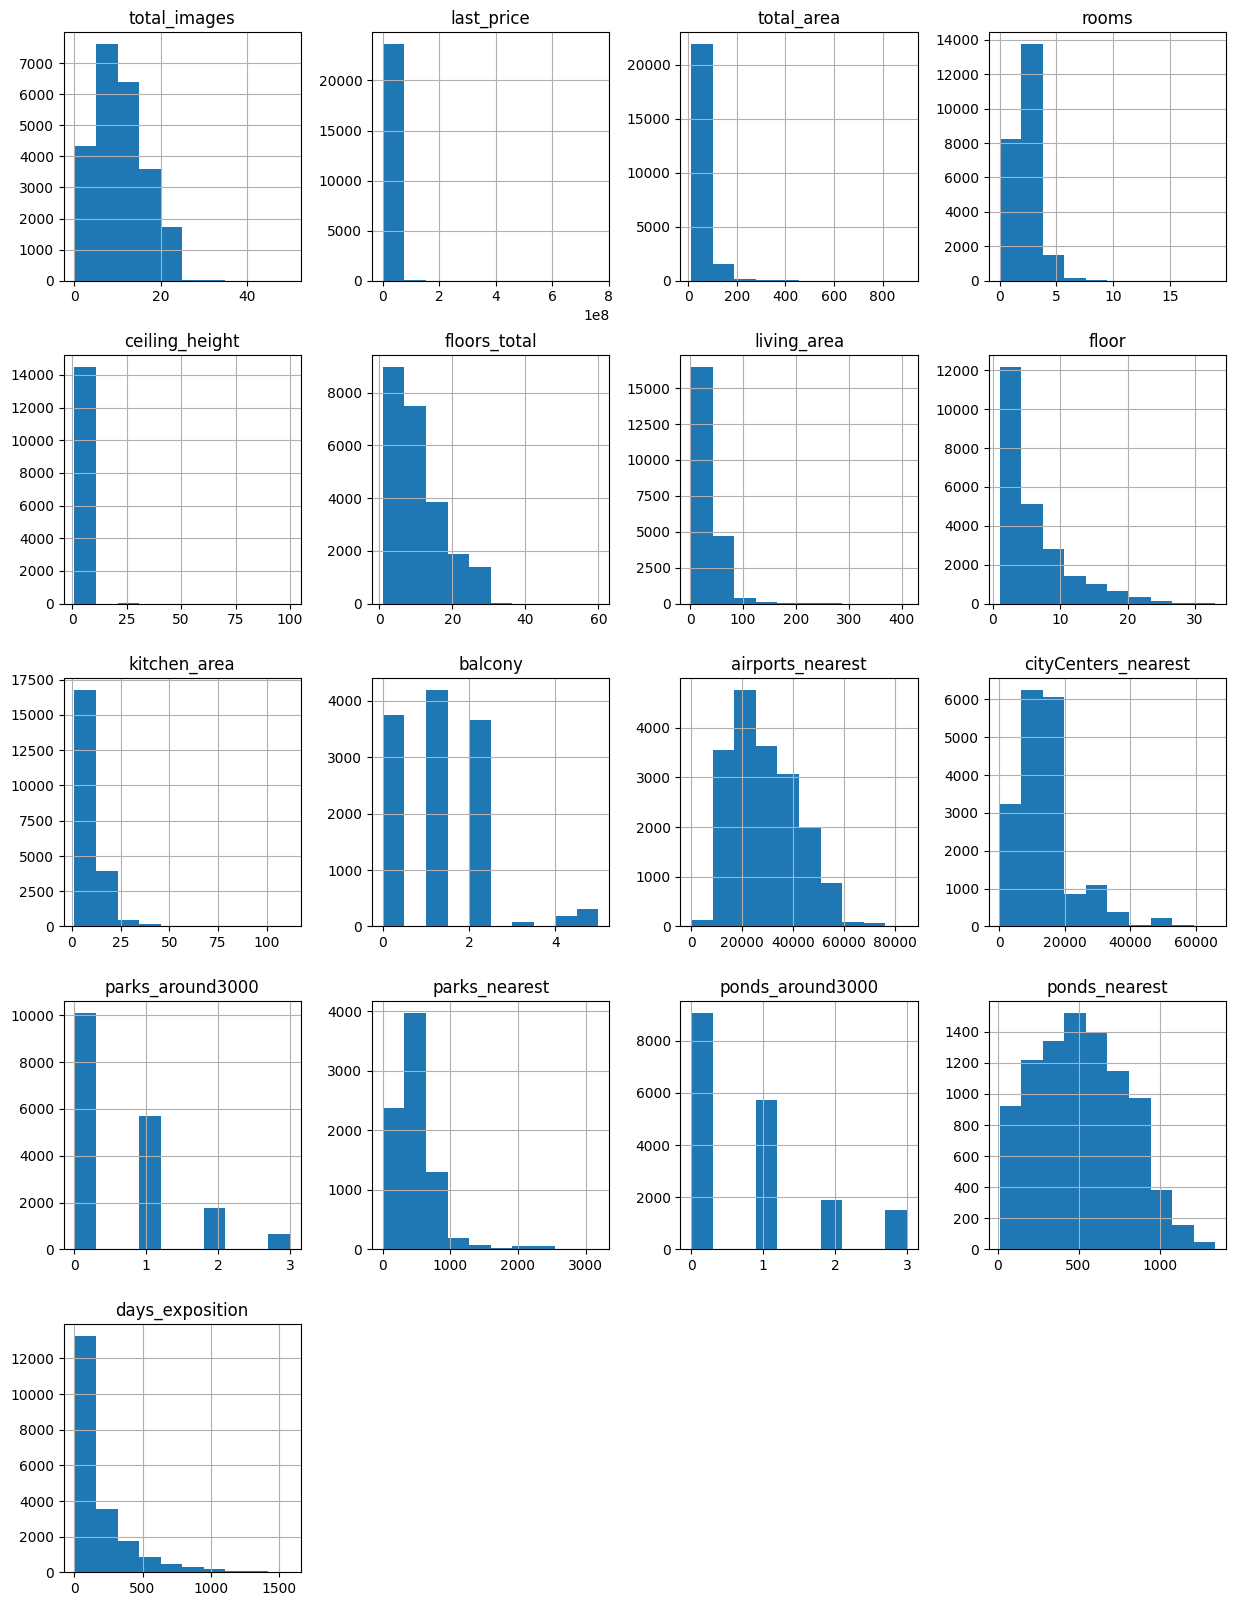

In [5]:
df.hist(figsize=(15, 20));

Посмотрим описательную статистику:

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

Всего у нас 23699 записи. Для целого ряда столбцов есть пропущенные значения и некорректный тип данных. По ряду признаков имеются аномальные значения:

- *last_price:* минимальная цена квартиры 12190 руб., что явно не характерно для рынка СПб и ЛО. Похоже на ошибку. Максимальная цена 763 000 000 руб. очень большая, но для исторических/элитных объектов возможна.
Такие значения могут плохо влиять на среднее значение, вероятно, большие данные тоже стоит исключить.

- *rooms:* минимальное число комнат 0 - ошибка. Как вариант это может быть квартира-студия. Нужно проверить.

- *ceiling_height:* минимальная высота потолков 1 метр, максимальная - 100 метров. Явно ошибка.

- *floors_total:* max количество этажей 60 похоже на ошибку, самое высокое здание в Санкт-Петербурге и окретностях - Лахта имеет 35 этажей.

- *living_area:* min жилая площадь 2 м² невозможна, ошибка.

- *kitchen_area:* min площадь кухни 1,3 м² невозможна, ошибка.

- *airports_nearest:* min расстояние до аэропорта 0 м невозможно. Два варианта событий: либо нет данных и заполнили нулем, либо ошибка.

- *days_exposition:* минимальное количество дней размещения объявления - 1. Продажа недвижимости за 1 день или снятие объявления по другой причине - допустимый вариант, но, если таких объявлений много, то такие данные могут негативно влиять на среднее. Максимальное значение - 1580 дней (больше 4-х лет) также может негативно влиять на среднее время.

## Предобработка данных

### Переименования столбцов

Переименуем столбец 'cityCenters_nearest' в "змеином стиле"

In [7]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

### Удаление столбцов

In [8]:
#Столбец с количеством фотографий в дальнейшем анализе нам не понадобится. Он лишний - удалим его:
df = df.drop(['total_images'], axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23699 non-null  float64
 1   total_area            23699 non-null  float64
 2   first_day_exposition  23699 non-null  object 
 3   rooms                 23699 non-null  int64  
 4   ceiling_height        14504 non-null  float64
 5   floors_total          23613 non-null  float64
 6   living_area           21796 non-null  float64
 7   floor                 23699 non-null  int64  
 8   is_apartment          2775 non-null   object 
 9   studio                23699 non-null  bool   
 10  open_plan             23699 non-null  bool   
 11  kitchen_area          21421 non-null  float64
 12  balcony               12180 non-null  float64
 13  locality_name         23650 non-null  object 
 14  airports_nearest      18157 non-null  float64
 15  city_centers_neares

### Оценка допустимого объема потерь датасета


На этапе предобработки данных нам прийдется избавляться от части строк датасета (выбросы, неполные и недостоверные данные и т.п.).

In [9]:
df.shape

(23699, 21)

В датафрейме 23.7 тыс. записей.
Какой объем данных нам не принципиально будет потерять?

Уровни критичности потерь данных от общего количества 23.7 тыс. записей примем следующим образом:
- потеря 2% от числа всех записей несущественно повлияет на результаты анализа;
- и даже потеря 5% будет вполне приемлима;
- тогда как потеря 10% и более способна исказить результаты анализа.

In [10]:
# Создадим список `bad_indexes`.
# В него мы будем записывать индексы строк исходного датафрейма, которые впоследствии удалим.
bad_indexes = []
#Для этого будет использоваться конструкция: bad_indexes.extend(df.index)

for i in [2,5,10]:
    print(i, '% это', int(len(df)*i/100), 'строк датафрейма.\n')

2 % это 473 строк датафрейма.

5 % это 1184 строк датафрейма.

10 % это 2369 строк датафрейма.



In [11]:
# Функция для оценки величины потерь данных
def checklost(lost):
    if lost <= 473:
        return print("Это несущественно\n")
    elif lost <= 1184:
        return print("Это приемлемо\n")
    elif lost <= 2369:
        return print("Это серьёзно\n")
    else:
        return print("Затрудняюсь ответить((\n")

### Работа с пропусками

Признаков в наборе не очень много, попробуем визуализировать пропущенные значения с помощью тепловой карты.

<Axes: >

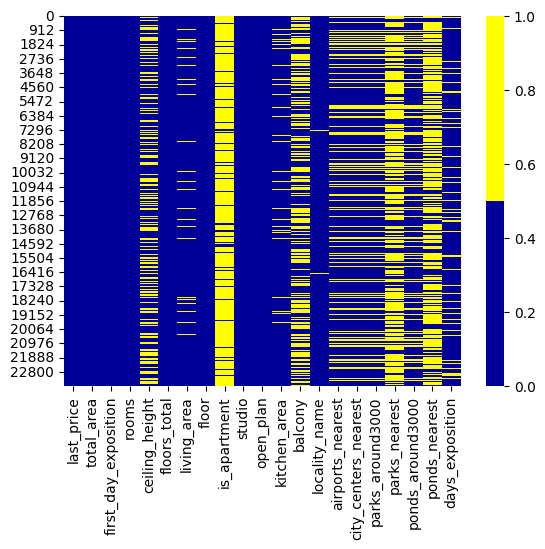

In [12]:
cols = df.columns[:21] # первые 21 колонка
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

По горизонтальной оси расположены признаки, по вертикальной – количество записей/строк. Желтый цвет соответствует пропускам данных.

Заметно, например, что признаки `ceiling_height`, `is_apartment`, `balcony`, `parks_nearest`, `ponds_nearest` имеют довольно много пустых строк, а остальные или полностью заполнены, или пустых не так много.

 Можно также глянуть на столбцы, в которых имеются пропуски, в процентном соотношении к общему количеству строк.

In [13]:
# Подготовим наглядную таблицу по столбцам, в которых имеются пропуски
dct = { 'Name':[],
        'type':[],
        'isna_count':[],
        'percent':[]
 }
dframe = pd.DataFrame(dct) 

ncolumn = 0
n = 0
for column in df.columns:
    na = df[column].isna().sum()
    if na > 0:
        ncolumn += 1
        name_column = df.columns[n]
        type_column = df[column].dtype
        percent = (100*na/len(df)).round(2)
        dframe.loc[-1] = [name_column, type_column, na, percent] # adding a row
        dframe.index = dframe.index + 1  # shifting index
    n += 1
    
dframe = dframe.sort_values('percent', ascending=True)
dframe.reset_index(drop=True, inplace=True)
display(dframe)
print('Всего пропуски найдены в {} столбцах'.format(ncolumn))


,Name,type,isna_count,percent
0,locality_name,object,49,0.21
1,floors_total,float64,86,0.36
2,living_area,float64,1903,8.03
3,kitchen_area,float64,2278,9.61
4,days_exposition,float64,3181,13.42
5,parks_around3000,float64,5518,23.28
6,ponds_around3000,float64,5518,23.28
7,city_centers_nearest,float64,5519,23.29
8,airports_nearest,float64,5542,23.38
9,ceiling_height,float64,9195,38.80


Всего пропуски найдены в 14 столбцах


Скорее всего, по некоторым строкам данные геолокации отсутствуют одновременно в нескольких столбцах. Брать такие строки для анализа географического расположения объекта недвижимости будет нельзя. Проверим, так ли это?

In [14]:
len(df.loc[((df['parks_around3000'].isna())&
            (df['parks_nearest'].isna())&
            (df['ponds_around3000'].isna())&
            (df['ponds_nearest'].isna())&
            (df['city_centers_nearest'].isna())&
            (df['airports_nearest'].isna()))])

5518

Действительно, по 5518 строкам данные геолокации отсутствуют полностью. Возможно, из-за технической ошибки при наполнении датасета, или из-за отсутствия технической возможности определения геолокации объекта недвижимости - точно этого мы уже никогда не узнаем.

Удалить 5,5 тыс. записей (а это около 20%)? Это значительная часть, и риск потерять значимую информацию слишком велик.

Эти строки можно было бы заполнить какой-нибудь заглушкой, типа "Данные отсутствуют", но тогда мы будем иметь в столбцах с данными геолокации значения различного типа (float и str), что может привести к проблемам при применении к этим столбцам математических методов. В то время как пропуски NaN не помешают математическим методам анализа.

Будем держать пропуски геолокации "в уме" и оставим пока данные в этих столбцах без изменений.

### Гистограмма пропущенных данных

created missing indicator for: ceiling_height
created missing indicator for: floors_total
created missing indicator for: living_area
created missing indicator for: is_apartment
created missing indicator for: kitchen_area
created missing indicator for: balcony
created missing indicator for: locality_name
created missing indicator for: airports_nearest
created missing indicator for: city_centers_nearest
created missing indicator for: parks_around3000
created missing indicator for: parks_nearest
created missing indicator for: ponds_around3000
created missing indicator for: ponds_nearest
created missing indicator for: days_exposition


<Axes: >

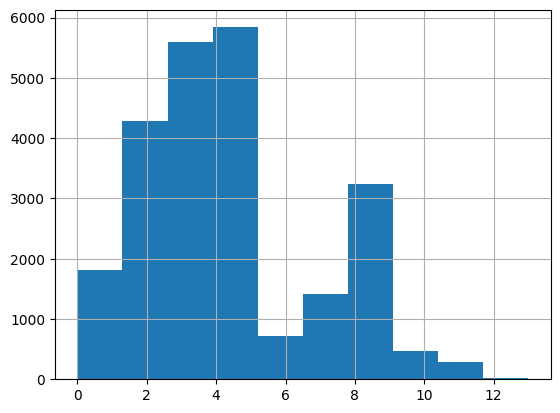

In [15]:
# сначала создаем индикатор для признаков с пропущенными данными
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# затем на основе индикатора построим гистограмму
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts()
df.reset_index().sort_values(by='index')
df['num_missing'].hist()

Отсюда понятно, что из 23,7 тыс. записей около 1,8 тыс. строк не имеют ни одного пропущенного значения, еще около 1,8 тыс.– всего одно. Такие строки возможно использовать в качестве «эталонных» для проверки различных гипотез по дополнению данных.

### Внесение недостающих значений

Заполним пропущенные значения там, где это возможно.

Для численных признаков можно воспользоваться методом принудительного заполнения пропусков - значением подходящими по смыслу для рассматриваемой колонки.

In [16]:
# Количество балконов
df['balcony'] = df['balcony'].fillna(0)
# Количество парков
df['parks_around3000'] = df['parks_around3000'].fillna(0)
# Количество прудов
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

### Удаление строк с неполными данными

В некоторых случаях, мы имеем строки с неполными данными. Когда таких строк в датафрейме не очень много и они не оказывают существенного влияния на результаты исследования, их проще удалить, чем пытаться исправить.

Например, некоторые респонденты не заполнили информацию о квартире, которая представляет для нашего исследования существенный интерес: жилая площадь и расстояние до центра города.
Такие строки малоинформативны и не представляют особого интереса.

В то же время, некоторая информация в этих строках вполне возможно нам еще пригодится (например, для расчета средних или медианных значений, для рассчета доли категориальных показателей и т.п.). Поэтому, на данном этапе, такие строки будут только "помечены на удаление", а удалены позже, непосредственно перед этапом исследовательского анализа данных.

Посмотрим, сколько таких записей, в которых пропущено сразу несколько ключевых характеристик объекта недвижимости?

In [17]:
len(df.loc[(  
    (df['living_area'].isna())&            # жилая площадь в квадратных метрах (м²)
    (df['city_centers_nearest'].isna())    # расстояние до центра города (м)
    )])

623

In [18]:
# Добавим эти записи к списку "на удаление":
bad_indexes.extend(df.loc[(
            (df['city_centers_nearest'].isna())&
            (df['living_area'].isna())
            )].index)

In [19]:
# Проверка критичности удаления строк датасета
print('Помечено "на удаление" строк:', len(pd.Series(bad_indexes).unique()))
checklost(len(pd.Series(bad_indexes).unique()))

Помечено "на удаление" строк: 623
Это приемлемо



### Замена недостающих значений

Можно использовать некоторый дефолтный плейсхолдер для пропусков, например, новую категорию _MISSING_ для категориальных признаков или число -9999 для числовых.

Таким образом, мы сохраняем данные о пропущенных значениях, что тоже может быть ценной информацией.

Установим маркеры -9999 для обозначения пропусков.

In [20]:
# Сколько дней было размещено объявление (от публикации до снятия)
df['days_exposition'].fillna(-9999, inplace=True)
# Расстояние до центра города (м)
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(-9999)
# Расстояние до ближайшего аэропорта в метрах (м)
df['airports_nearest'] = df['airports_nearest'].fillna(-9999)
# Расстояние до ближайшего водоёма (м)
df['ponds_nearest'] = df['ponds_nearest'].fillna(-9999)
# Расстояние до ближайшего парка (м)
df['parks_nearest'] = df['parks_nearest'].fillna(-9999)


- Столбец `locality_name`

Информация о местонахождении объекта недвижимости - одна из ключевых. Но в 49 записях она пропущена, и восстановить ее не представляется возможным.

Такие записи проще всего удалить.

In [21]:
bad_indexes.extend(df.loc[df['locality_name'].isna()].index)
# К списку "на удаление" добавим также и записи, где не указана этажность
bad_indexes.extend(df.loc[df['floors_total'].isna()].index)

In [22]:
# Проверка критичности удаления строк датасета
print('Помечено "на удаление" строк:', len(pd.Series(bad_indexes).unique()))
checklost(len(pd.Series(bad_indexes).unique()))

Помечено "на удаление" строк: 750
Это приемлемо



Логично предположить, что в объявлениях часто не указывают (NaN) площадь кухни, если она не выделена в отдельную комнату: в квартирах со свободной планировкой и в квартирах-студиях, поэтому, попущенные значения приравняем к нулю.

In [23]:
df['kitchen_area'].where((df['kitchen_area'].isna()) & (df['open_plan']), 0)
df['kitchen_area'].where((df['kitchen_area'].isna()) & (df['studio']), 0)
print('--')

--


In [24]:
# Для остальных - заменим пустые значения жилой площади и площади кухни медианными значениями
kitchen_ratio = df['kitchen_area'].median() / df['total_area'].median()
df['kitchen_area'].fillna(kitchen_ratio * df['total_area'], inplace=True)

living_ratio = df['living_area'].median() / df['total_area'].median()
df['living_area'].fillna(living_ratio * df['total_area'], inplace=True)

- Столбец `ceiling_height`

In [25]:
# До замены количество пропущенных значений
display(df['ceiling_height'].isna().value_counts())
print('Пропущено:', round(df['ceiling_height'].isna().value_counts()[1] / len(df) * 100, 2), '%')

ceiling_medians = df.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
print('Этажность:', ceiling_medians.index)
ceiling_medians.head()

ceiling_height
False    14504
True      9195
Name: count, dtype: int64

Пропущено: 38.8 %
Этажность: Index([ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0,
       13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0,
       25.0, 26.0, 27.0, 28.0, 29.0, 34.0, 35.0, 36.0, 37.0, 52.0, 60.0, 33.0],
      dtype='float64', name='floors_total')


,median,count
floors_total,,
1.0,2.80,10
2.0,2.70,215
3.0,2.80,399
4.0,3.00,789
5.0,2.55,3666


In [26]:
# Для этажности c отсутствующим значением median (ceiling_medians.loc[floor, 'count'] == 0) заполним медианой по высоте всех потолков (df['ceiling_height'].describe()[5])
for floor in ceiling_medians.index:
    df.loc[(df['floors_total'].isna()) | 
             ((df['floors_total'] == floor) & (ceiling_medians.loc[floor, 'count'] == 0)), 
             'ceiling_height'] = df['ceiling_height'].describe()[5]

# Подставим значения медиан из pivot_table с учетом этажности в пропущенные значения высоты потолков из df
for floor in ceiling_medians.index:
    df.loc[(df['ceiling_height'].isna()) & 
             (df['floors_total'] == floor), 
             'ceiling_height'] = ceiling_medians.loc[floor, 'median']

# Посчитаем количество пропущенных значений после проделанной замены
df['ceiling_height'].isna().value_counts()


ceiling_height
False    23699
Name: count, dtype: int64

In [27]:
# Перезаполним все указанные, но некорректные значения (< 2.1 метра) значением 2.1 м
df['ceiling_height'] = df['ceiling_height'].where((df['ceiling_height'] >= 2.1), 2.1)

- Столбец `is_apartment`

Для обычной квартиры это поле могут оставить незаполненным, - заполним все пропуски значениями False по умолчанию.

In [28]:
df['is_apartment'] = df['is_apartment'].fillna(False)

### Обработка дубликатов

#### Обработка явных дубликатов

In [29]:
df.duplicated().sum()

0

Проверка явных дубликатов показала, что в датасете отсутствуют повторяющиеся строки

#### Обработка неявных дубликатов в столбце `locality_name`

Проблема разных форматов адреса точно существует.
Даже если визуально не обнаружено беспорядка в этом признаке, все равно стоит стандартизировать их для надежности.

In [30]:
# Проверим количество уникальных записей до обработки
df['locality_name_std'] = df['locality_name']
len(df['locality_name_std'].sort_values().unique())

365

Для представления данных будем выводить `locality_name`, а для анализа данных использовать новый, стандартизированный по определенному шаблону названия, столбец `locality_name_std`.

Минимальное форматирование включает следующие операции:
- приведение всех символов к нижнему регистру;
- удаление пробелов в начале и конце строки;
- удаление точек;
- стандартизация формулировок: замена 'поселок' и 'посёлок' и т. д.

In [31]:
df['locality_name_std'] = df['locality_name_std'].str.lower()
df['locality_name_std'] = df['locality_name_std'].str.strip()
df['locality_name_std'] = df['locality_name_std'].str.replace('\\.', '')

In [32]:
# выведем уникальные значения locality_name
df['locality_name_std'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок янино-1', 'городской посёлок будогощь',
       'городской посёлок виллози', 'городской посёлок лесогорский',
       'городской посёлок мга', 'городской посёлок назия',
       'городской посёлок новоселье', 'городской посёлок павлово',
       'городской посёлок рощино', 'городской посёлок свирьстрой',
       'городской посёлок советский', 'городской посёлок фёдоровское',
       'городской посёлок янино-1', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка

Можно заметить:
- 'поселок' и 'посёлок' дублируют значения.
-  обозначения одних и тех же населённых пунктов: «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» и т.п.

In [33]:
# Через replace приведем к одному значению посёлок
df['locality_name_std'] = df['locality_name_std'].str.replace('поселок', 'посёлок') 

# Обработаем выявленные дубли через replace
df = df.replace(
    {'locality_name':
        {'Никольское': 'село Никольское'
        , 'городской посёлок Советский': 'посёлок городского типа Советский'
        , 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора'
        , 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский'
        , 'посёлок Рябово': 'посёлок городского типа Рябово'
        , 'городской посёлок Мга': 'посёлок городского типа Мга'
        , 'городской посёлок Павлово': 'посёлок городского типа Павлово'
        , 'городской посёлок Назия': 'посёлок городского типа Назия'
        , 'коттеджный посёлок Лесное': 'посёлок Лесное'
        , 'Мурино': 'посёлок Мурино'
        , 'Любань': 'посёлок Любань'
        , 'городской посёлок Рощино': 'посёлок городского типа Рощино'
        , 'деревня Кудрово': 'Кудрово'
        }
    })

# выведем уникальные значения locality_name
df['locality_name_std'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской посёлок большая ижора',
       'городской посёлок будогощь', 'городской посёлок виллози',
       'городской посёлок лесогорский', 'городской посёлок мга',
       'городской посёлок назия', 'городской посёлок новоселье',
       'городской посёлок павлово', 'городской посёлок рощино',
       'городской посёлок свирьстрой', 'городской посёлок советский',
       'городской посёлок фёдоровское', 'городской посёлок янино-1',
       'деревня агалатово', 'деревня аро', 'деревня батово',
       'деревня бегуницы', 'деревня белогорка', 'деревня большая вруда',
       'деревня большая пустомержа', 'деревня большие колпаны',
       'деревня большое рейзино', 'деревня большой сабск', 'деревня бор',
       'деревня борисова грива', 'деревня ваганово', 'деревня вартемяги',
       'деревня вахнова кара', 'деревня выскатка', 'деревня гарболово',
       'деревня глинка', 'деревня горбунки', 'дерев

Проверим, сколько уникальных названий населенных пунктов стало в столбце locality_name_std

In [34]:
len(df['locality_name_std'].sort_values().unique())

331

### Нетипичные данные (выбросы)

Выбросы – это данные, которые существенно отличаются от других наблюдений. Они могут соответствовать реальным отклонениям, но могут быть и просто ошибками.

Если признак численный, можно построить гистограмму или коробчатую диаграмму (ящик с усами).

Посмотрим на примере уже знакомого нам признака `ceiling_height`.

In [35]:
# Посмотрим на описательную статистику
df['ceiling_height'].describe()

count    23699.000000
mean         2.735747
std          0.994133
min          2.100000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

<Axes: >

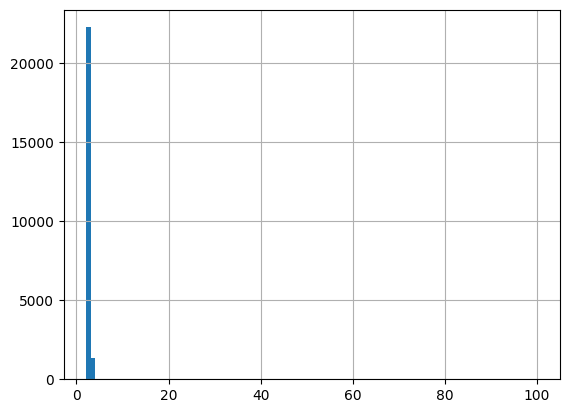

In [36]:
df['ceiling_height'].hist(bins=100)

Из-за возможных выбросов данные выглядят сильно искаженными.

<Axes: >

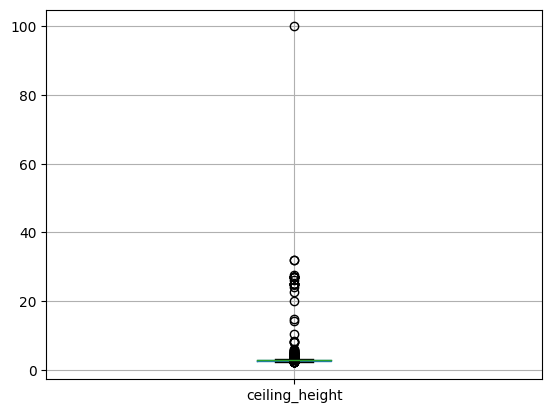

In [37]:
# Чтобы изучить особенность поближе, построим коробчатую диаграмму.
df.boxplot(column=['ceiling_height'])

Видим, что имеется выброс со значением 100.

In [38]:
#Посмотрим, сколько таких строк в нашем датасете
df.loc[:,['ceiling_height']].loc[df['ceiling_height']==100]

,ceiling_height
22869,100.0


In [39]:
#Аномально большое значение всего одно, мы не потеряем многого, если пометим его на удаление
bad_indexes.extend(df.loc[df['ceiling_height']==100].index)

<Axes: >

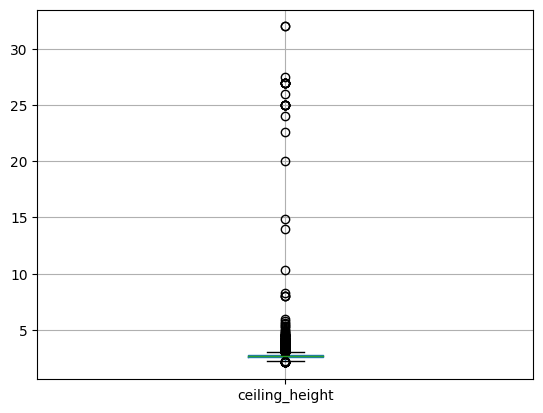

In [40]:
#Но даже без аномального значения, мы всё еще видим достаточно много верхних значений,
#не попадающих в размах усов 1,5 от размера третьего квартиля (2.8*1.5 примерно 4.2 м)- это статистические выбросы.
df.loc[:, ['ceiling_height']].loc[df['ceiling_height'] != 100].boxplot() 

In [41]:
# Посмотрим, сколько строк со значения выше 20м 
len(df.loc[df['ceiling_height']>20])

22

Восстановим корректные значения `ceiling_height`

In [42]:
# Значения выше 20 м достаточно редки, и можно предположить, что это просто ошибка ввода: пропущенная запятая.
# Исправим данные, снизив разрядность таких данных на 1 знак:
df['ceiling_height'] = (df['ceiling_height']
                        .loc[df['ceiling_height'] != 100]
                        .where(df['ceiling_height'] <= 20, (df['ceiling_height'] / 10))
                        )

array([[<Axes: title={'center': 'ceiling_height'}>]], dtype=object)

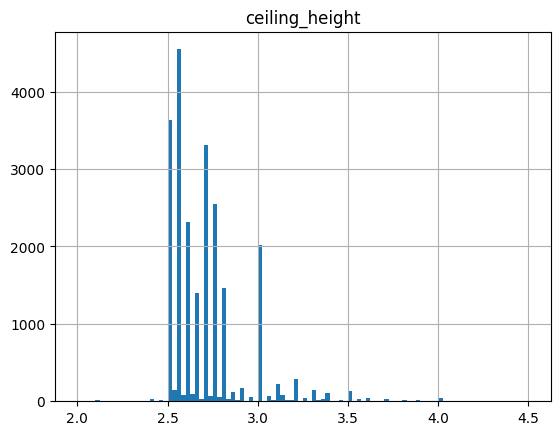

In [43]:
df.loc[:, ['ceiling_height']].loc[df['ceiling_height'] != 100].hist(bins=100, range=(2,4.5))

In [44]:
# Значения меньше 2.1 или больше 4.5 метров редки и малоправдоподобны:
len(df.loc[(df['ceiling_height'] < 2.1)|(df['ceiling_height'] >= 4.2)])


46

In [45]:
# Их также можно пометить на удаление
bad_indexes.extend(df.loc[(df['ceiling_height'] <= 2)|(df['ceiling_height'] >= 4.5)].index)

Обработка выбросов и аномалий по другим столбцам будет сделана аналогичным образом:

1. Сначала будет произведена общая оценка: размах вариации, средние и медианные значения, разброс значений и границы квартилей.

2. Оценка также будет проведена визуально (графически).

3. Затем, ориентируясь на границы квартилей, будут определены статистические выбросы.

4. Граница отсечения выбросов будет откорректирована вручную, исходя из значимости потерь в данных в случае отсечения строк с выбросами из датасета

##### Столбец `total_area` (общая площадь квартиры)

In [46]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<Axes: >

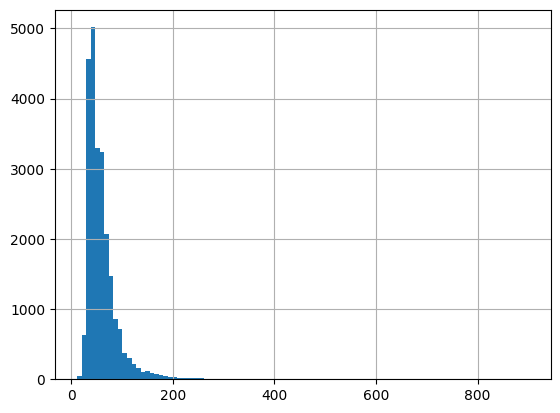

In [47]:
df['total_area'].hist(bins=100)

In [48]:
bad_indexes.extend(df[df['total_area'] > 350].index)
# Проверка критичности удаления строк датасета
print('Помечено "на удаление" строк:', len(pd.Series(bad_indexes).unique()))
checklost(len(pd.Series(bad_indexes).unique()))

Помечено "на удаление" строк: 816
Это приемлемо



##### Столбец `living_area` (жилая площадь)

In [49]:
df['living_area'].describe()

count    23699.000000
mean        34.624296
std         22.381873
min          2.000000
25%         19.000000
50%         30.000000
75%         42.173077
max        409.700000
Name: living_area, dtype: float64

<Axes: >

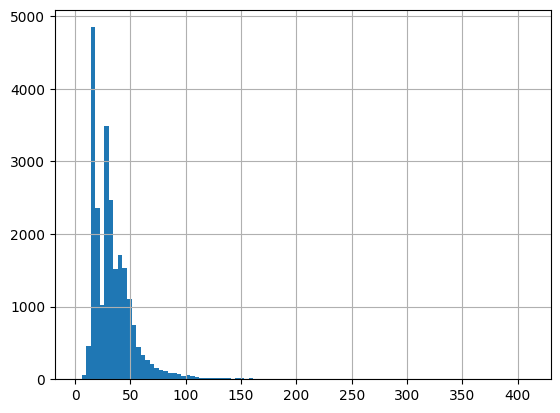

In [50]:
df['living_area'].hist(bins=100)

In [51]:
bad_indexes.extend(df[df['living_area'] > 350].index)
# Проверка критичности удаления строк датасета
print('Помечено "на удаление" строк:', len(pd.Series(bad_indexes).unique()))
checklost(len(pd.Series(bad_indexes).unique()))

Помечено "на удаление" строк: 816
Это приемлемо



##### Столбец `kitchen_area` (площадь кухни)

In [52]:
df['kitchen_area'].describe()

count    23699.000000
mean        10.505495
std          6.039401
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<Axes: >

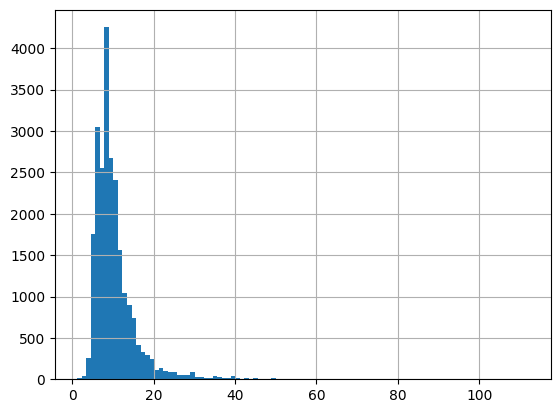

In [53]:
df['kitchen_area'].hist(bins=100)

In [54]:
bad_indexes.extend(df[df['kitchen_area'] > 50].index)
# Проверка критичности удаления строк датасета
print('Помечено "на удаление" строк:', len(pd.Series(bad_indexes).unique()))
checklost(len(pd.Series(bad_indexes).unique()))

Помечено "на удаление" строк: 858
Это приемлемо



##### Столбец `rooms` (количество комнат)

In [55]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<Axes: >

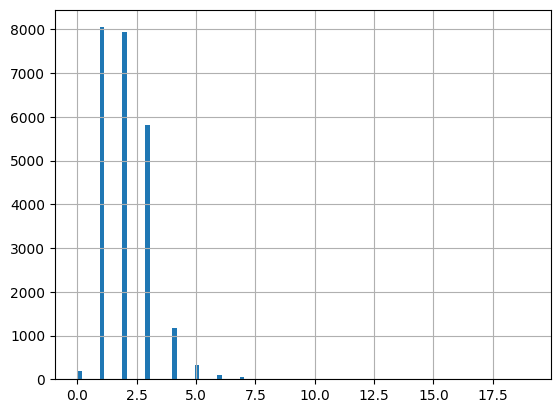

In [56]:
df['rooms'].hist(bins=100)

In [57]:
bad_indexes.extend(df[df['rooms'] > 18].index)
# Проверка критичности удаления строк датасета
print('Помечено "на удаление" строк:', len(pd.Series(bad_indexes).unique()))
checklost(len(pd.Series(bad_indexes).unique()))

Помечено "на удаление" строк: 858
Это приемлемо



##### Столбец `balcony` (количество балконов)

In [58]:
df['balcony'].describe()

count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

##### Столбец `floor` (этаж квартиры)

In [59]:
df['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

##### Столбец `floors_total` (общее количество этажей в доме)

In [60]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [61]:
bad_indexes.extend(df[df['floors_total'] > 35].index)
# Проверка критичности удаления строк датасета
print('Помечено "на удаление" строк:', len(pd.Series(bad_indexes).unique()))
checklost(len(pd.Series(bad_indexes).unique()))

Помечено "на удаление" строк: 863
Это приемлемо



##### Столбец `last_price` (цена объекта)

In [62]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<Axes: >

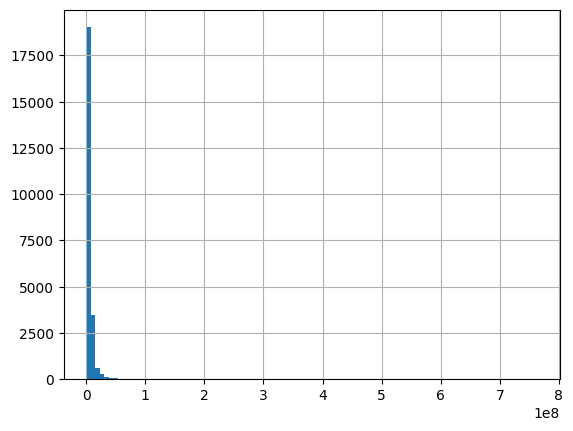

In [63]:
df['last_price'].hist(bins=100)

Наверное, цена - это очень индивидуальная и, иногда, очень субъективная характеристика. Поэтому, здесь вряд ли подойдут какие-то типовые рекомендации, наподобие модели "ящика с усами".
Наверное, единственное, что здесь стоит сделать - избавиться от очень дорогой элитной недвижимости (более 50 млн.руб.). Эти объявления наверняка носят "штучный" характер и искажают общую картину статистическими "выбросами" (причем не только по цене, но, скорее всего, и по другим характеристикам: площадь, количество балконов и проч.).

In [64]:
bad_indexes.extend(df[df['last_price'] > 50000000].index)
# Проверка критичности удаления строк датасета
print('Помечено "на удаление" строк:', len(pd.Series(bad_indexes).unique()))
checklost(len(pd.Series(bad_indexes).unique()))

Помечено "на удаление" строк: 950
Это приемлемо



#### Общие результаты проведенной предобработки данных

Проверим, сколько всего строк мы собираемся удалить из датафрейма по результатам предобработки:

In [65]:
print('Всего помечено "на удаление" строк:', len(pd.Series(bad_indexes).unique()))
checklost(len(pd.Series(bad_indexes).unique()))

Всего помечено "на удаление" строк: 950
Это приемлемо



Как мы видим, количество помеченных строк приемлемо. Однако избавившись от них, мы значительно повысим качество данных для анализа. Итоговый датафрейм будет очищен от статистических выбросов, аномалий и пропущенных значений.

Запишем датафрейм с удаленными в результате предобработки строками, в переменную `data`. Исходный датафрейм `df` приведем к изначальному виду. Это позволит нам при необходимости обращаться к сравнению данных до и после предобработки, чтобы оценить качество проделанной работы по предобработке данных.

In [66]:
data = df
data.drop(labels = bad_indexes, axis = 0, inplace = True)
# Сбрасываем индексы в датафрейме (исходные индексы запишем в отдельный столбец):
data.reset_index(drop=False, inplace=True)
#Перезапишем исходный датафрейм для сравнения:
df = pd.read_csv(dataset_path, sep='\t')
# На предобработке изменение типа данных не сработало, из-за наличия пропусков в столбце 'floors_total'.
# В постобработанном датафрейме пропусков нет. Посмотрим, сработает ли теперь:
data['floors_total'] =  data['floors_total'].astype('int')

In [67]:
# Посмотрим еще раз (после удаления) на типы данных в столбцах нашего датафрейма:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22749 entries, 0 to 22748
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           22749 non-null  int64  
 1   last_price                      22749 non-null  float64
 2   total_area                      22749 non-null  float64
 3   first_day_exposition            22749 non-null  object 
 4   rooms                           22749 non-null  int64  
 5   ceiling_height                  22749 non-null  float64
 6   floors_total                    22749 non-null  int32  
 7   living_area                     22749 non-null  float64
 8   floor                           22749 non-null  int64  
 9   is_apartment                    22749 non-null  bool   
 10  studio                          22749 non-null  bool   
 11  open_plan                       22749 non-null  bool   
 12  kitchen_area                    

Как мы видим, из датафрейма удалено 944 строк (как и планировалось), что составляет меньше 5% от общего количества строк. 

Типы данных во всех столбцах соответствуют содержащейся в них информации.

Проверим, не осталось ли в датафрейме пропущенных значений:

<Axes: >

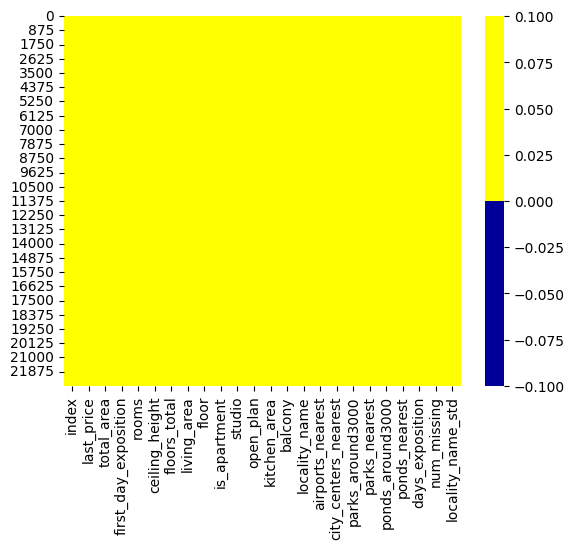

In [68]:
# Интересуют колонки без суффикса 'ismissing'
cols = [col for col in data.columns if not 'ismissing' in col]
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

Отлично, пропусков нет.

Для наглядности представления данных изменим тип некоторых признаков по их смысловому сождержанию:
1. Булев тип:
- 'is_apartment':'bool', апартаменты
2. Не могут быть дробным:
- 'balcony':'int', число балконов
- 'floors_total':'int', всего этажей в доме
3. Не имеет смысла хранить более высокую точноcть, чем int:
- "airports_nearest":'int', расстояние до ближайшего аэропорта в метрах (м)
- 'parks_around3000':'int', число парков в радиусе 3 км
- 'ponds_around3000':'int', число водоёмов в радиусе 3 км
- 'city_centers_nearest':'int', расстояние до центра города (м)
- 'days_exposition':'int', сколько дней было размещено объявление (от публикации до снятия)
4. Не имеет смысла хранить более высокую точноcть, чем float:
- 'last_price':'float' стоимость квартиры


In [69]:
data = data.astype({
    'is_apartment':'bool',          # апартаменты (булев тип)
    'balcony':'int',                # число балконов
    'floors_total':'int',           # всего этажей в доме
    "airports_nearest":'int',       # расстояние до ближайшего аэропорта в метрах (м)
    'parks_around3000':'int',       # число парков в радиусе 3 км
    'ponds_around3000':'int',       # число водоёмов в радиусе 3 км
    'city_centers_nearest':'int',   # расстояние до центра города (м)
    'days_exposition':'int',        # дата публикации
    'last_price':'float'            # стоимость квартиры
    })
data = data.reset_index(drop = True)

# Дату публикации приводим к типу 'Дата'
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

### Выводы

Предобработка обнаружила и исправила проблемы в данных:

- нарушения в стиле заголовка колонки,
- пропущенные значения,
- дубликаты — явные и неявные.

Удалены строки с неполными данными. Принудительно заполнены недостающие значения там, где это возможно, или медианными значениями, или значениями по умолчанию, подходящими по смыслу.

В иных случаях, чтобы оставалась информация о пропущенных значениях:
- для категориальных признаков заполнены данные дефолтным '_MISSING_'
- для числовых - числом -9999.

Датасет очищен от статистических выбросов, аномалий и пропущенных значений.
Без дубликатов исследование станет более точным.

Датафрейм с обработанными в результате предобработки строками, записан в переменную `data`.
Это позволит нам, при необходимости, обращаться к сравнению данных до и после предобработки, чтобы оценить качество проделанной работы по предобработке данных.

## Добавление новых столбцов

### Цена за квадратный метр

In [70]:
def price_per_meter(row):
    return row["last_price"]/row['total_area']
    
data['price_per_meter'] = data.apply(price_per_meter, axis=1)

### День недели публикации объявления

In [71]:
#Добавим в датафрейм с данными столбец с днями недели:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
sorted(data['weekday_exposition'].unique())

[0, 1, 2, 3, 4, 5, 6]

### Месяц публикации объявления

In [72]:
#Добавим в датафрейм с данными столбец с днями недели:
data['month_exposition'] = data['first_day_exposition'].dt.month
sorted(data['month_exposition'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

### Год публикации объявления

In [73]:
data['year_exposition'] = data['first_day_exposition'].dt.year
sorted(data['year_exposition'].unique())

[2014, 2015, 2016, 2017, 2018, 2019]

### Категории квартиры по этажу

In [74]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floors_total'] == row['floor']:
        return 'последний'
    else:
        return 'другой'
        
data['floor_type'] = data.apply(floor_type,axis = 1)

### Расстояние до центра города в километрах

In [75]:
def city_centers_nearest_to_km(row):
    if (row['city_centers_nearest'] == -9999):
        return row['city_centers_nearest']
    else:
        return round((row['city_centers_nearest'] / 1000),0)

data['city_centers_nearest_km'] = data.apply(city_centers_nearest_to_km, axis=1)
data['city_centers_nearest_km'].head()

0      16.0
1      19.0
2      14.0
3       8.0
4   -9999.0
Name: city_centers_nearest_km, dtype: float64

## Проведите исследовательский анализ данных

### 1. Изучение основных параметров

In [76]:
# Создадим вспомогательный столбец для расчетов
data['count'] = 1

In [77]:
# Поделим все квартиры по ценовым категориям от 1 до 10,
# где 1 - очень дешевые, а 10 - очень дорогие квартиры
data['price_type'] = pd.qcut(data['last_price'], q=10, labels=[1,2,3,4,5,6,7,8,9,10], precision=0, duplicates='drop')

#### Параметры `общая площадь`, `жилая площадь`, `площадь кухни`

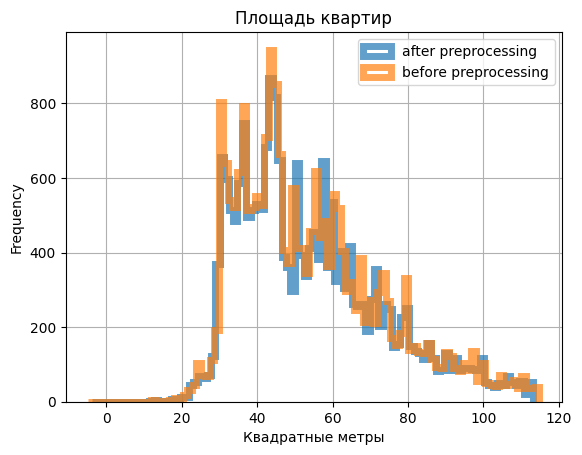

Наибольшие по площади варианты:
10148    347.5
2472     338.6
15552    336.0
14021    327.2
10648    320.0
7353     315.0
9180     313.0
7613     312.0
9191     312.0
12870    309.7
Name: total_area, dtype: float64


count    22749.000000
mean        59.011862
std         29.394688
min         12.000000
25%         40.000000
50%         52.000000
75%         69.200000
max        347.500000
Name: total_area, dtype: float64

In [78]:
# Работаем с общей площадью
# Рассчитаем по data: Q1, Q3 и IQR, чтобы построить график без выбросов
q1 = data['total_area'].quantile(.25) # первый квартиль Q1
q3 = data['total_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Рассчитаем по df: Q1, Q3 и IQR, чтобы построить график без выбросов
q1_df = df['total_area'].quantile(.25) # первый квартиль Q1
q3_df = df['total_area'].quantile(.75) # третий квартиль Q3
iqr_df = q3_df - q1_df # межквартильный размах IQR

ax = data.plot(
    y='total_area',
    label='after preprocessing',
    kind='hist',
    histtype='step',
    bins=100,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
    range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr))
)
df.plot(
    y='total_area',
    label='before preprocessing',
    kind='hist',
    histtype='step',
    bins=100,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
    ax=ax,
    range=((q1_df - 1.5 * iqr_df), (q3_df + 1.5 * iqr_df))
)
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.show()

print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))
data['total_area'].describe()

Рассматриваемый диапазон до примерно 115 м², исключая выбросы. Большая часть объектов недвижимости имеют площадь от 30 до 65 м². Самый распространенный вариант - около 45 м². Площадь объектов более 100 м² встречается редко. С площадью меньше 30 м² также редкость. Среднее значение - 60 м² и медиана 52 м² сдвинуты в сторону больших значений. Их не так много, но график получается растянутым.

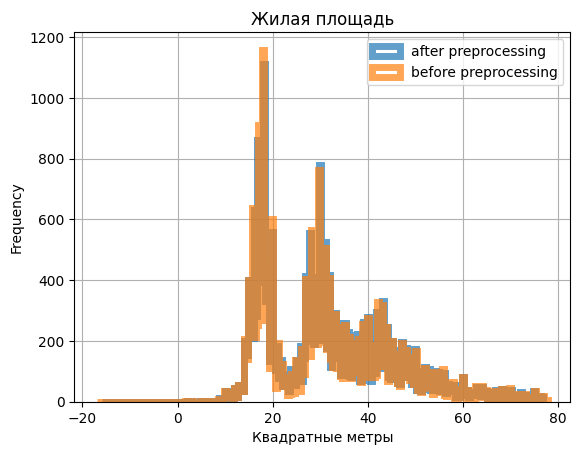

Наибольшие по жилой площади варианты:
2472     230.0
16242    225.9
20816    211.0
9843     200.0
12870    199.0
7613     194.0
4030     193.5
7381     193.0
10648    190.0
18138    189.4
Name: living_area, dtype: float64


count    22749.000000
mean        33.891921
std         19.179274
min          2.000000
25%         18.900000
50%         30.000000
75%         42.057692
max        230.000000
Name: living_area, dtype: float64

In [79]:
# Работаем с жилой площадью
# Рассчитаем по data: Q1, Q3 и IQR, чтобы построить график без выбросов
q1 = data['living_area'].quantile(.25) # первый квартиль Q1
q3 = data['living_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Рассчитаем по df: Q1, Q3 и IQR, чтобы построить график без выбросов
q1_df = df['living_area'].quantile(.25) # первый квартиль Q1
q3_df = df['living_area'].quantile(.75) # третий квартиль Q3
iqr_df = q3_df - q1_df # межквартильный размах IQR

ax = data.plot(
    y='living_area',
    label='after preprocessing',
    kind='hist',
    histtype='step',
    bins=230,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
    range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr))
)
df.plot(
    y='living_area',
    label='before preprocessing',
    kind='hist',
    histtype='step',
    bins=230,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
    ax=ax,
    range=((q1_df - 1.5 * iqr_df), (q3_df + 1.5 * iqr_df))
)
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.show()

print('Наибольшие по жилой площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))
data['living_area'].describe()

Рассматриваемый диапазон до примерно 78 м², исключая выбросы. Большая часть объектов недвижимости имеют жилую площадь от 15 до 35 м². Самый распространенный вариант - около 15 м². Жилая площадь объектов более 60 м² встречается редко. С площадью меньше 15 м² также редкость. Среднее значение - 34 м², медиана 30 м². У графика также наблюдается "хвост" из-за редких, но больших значений.

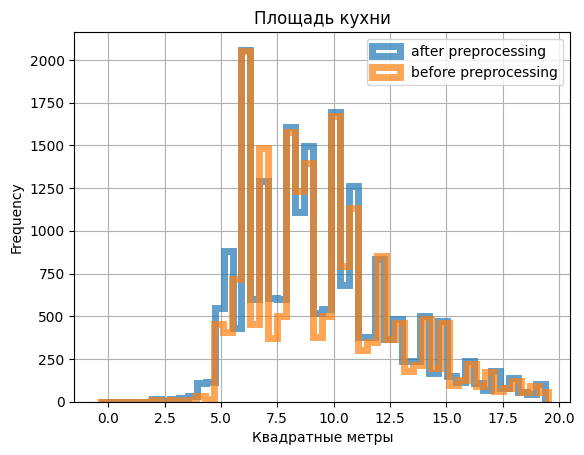

Наибольшие по площади кухни варианты:
2256     50.0
626      50.0
9616     50.0
48       50.0
4929     50.0
486      50.0
20475    49.4
249      49.2
6983     49.0
12644    48.5
Name: kitchen_area, dtype: float64


count    22749.000000
mean        10.300166
std          5.140842
min          1.300000
25%          7.000000
50%          9.000000
75%         11.950000
max         50.000000
Name: kitchen_area, dtype: float64

In [80]:
# Работаем с площадью кухни

# Рассчитаем по data: Q1, Q3 и IQR, чтобы построить график без выбросов
q1 = data['kitchen_area'].quantile(.25) # первый квартиль Q1
q3 = data['kitchen_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Рассчитаем по df: Q1, Q3 и IQR, чтобы построить график без выбросов
q1_df = df['kitchen_area'].quantile(.25) # первый квартиль Q1
q3_df = df['kitchen_area'].quantile(.75) # третий квартиль Q3
iqr_df = q3_df - q1_df # межквартильный размах IQR

ax = data.plot(
    y='kitchen_area',
    label='after preprocessing',
    kind='hist',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
    range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr))
)
df.plot(
    y='kitchen_area',
    label='before preprocessing',
    kind='hist',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
    ax=ax,
    range=((q1_df - 1.5 * iqr_df), (q3_df + 1.5 * iqr_df))
)
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.show()

print('Наибольшие по площади кухни варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))
data['kitchen_area'].describe()

Рассматриваемый диапазон до примерно 19 м², исключая выбросы. Большая часть объектов недвижимости имеют площадь кухни от 5,5 до 12 м². Самый распространенный вариант - около 5,5 м². Площадь кухни более 13 м² встречается редко. Площадь кухни менее 5 м² также редкость. Среднее значение - 10,5 м², медиана 9,1 м². У графика также наблюдается небольшой "хвост" из-за редких, но больших значений.

<Axes: xlabel='price_type'>

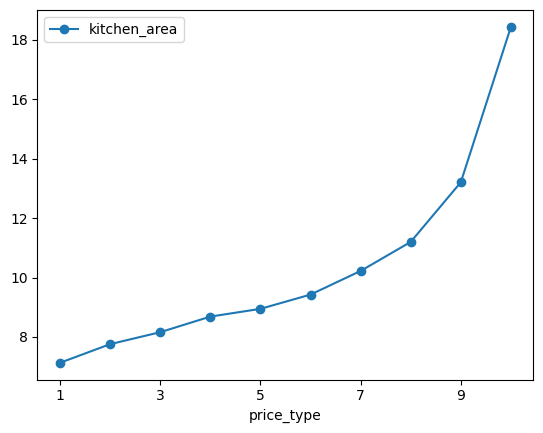

In [81]:
data.pivot_table(index='price_type', values='kitchen_area', aggfunc='mean').plot(style='o-')

##### Выводы

Как видно из графиков, результаты предобработки не повлияли на форму распределения исследуемого параметра.
Это значит, что основные статистические параметры совокупности остались без изменений или изменились незначительно.
Аналогичная картина наблюдается на остальных графиках.

#### Параметр `цена объекта`

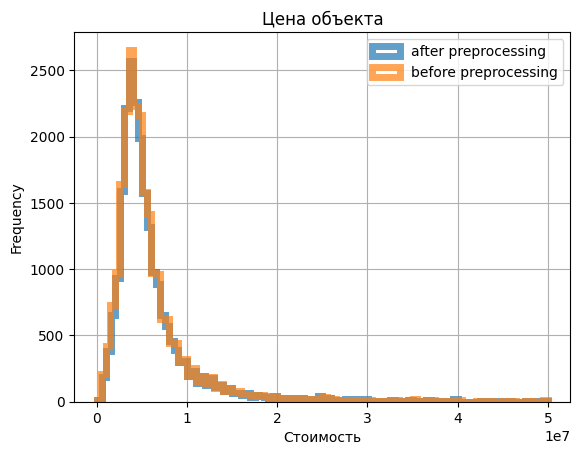

Наибольшие по цене варианты:
2891     50000000.0
2256     50000000.0
642      50000000.0
13888    50000000.0
4713     50000000.0
7412     50000000.0
9106     49900000.0
12786    49900000.0
13456    49798000.0
9616     49500000.0
Name: last_price, dtype: float64


count     0.022749
mean      6.023612
std       4.853991
min       0.012190
25%       3.499000
50%       4.680000
75%       6.790000
max      50.000000
Name: last_price, dtype: float64

In [82]:
# Работаем со ценой объекта
ax = data.plot(
    y='last_price',
    label='after preprocessing',
    kind='hist',
    histtype='step',
    bins=100,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
)
df.plot(
    y='last_price',
    label='before preprocessing',
    kind='hist',
    histtype='step',
    bins=100,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
    ax=ax,
    range=(0, 50000000),
)
plt.title('Цена объекта')
plt.xlabel('Стоимость')
plt.show()

print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))

data['last_price'].describe().apply(lambda x: x / 1000000)

Рассматриваем диапазон до примерно 12 млн руб., исключая выбросы. Большинство объектов недвижимости имеют цену в пределах от 3.5 до 6.8 млн. руб. Самый распространенный вариант - около 4.7 млн.руб. Вариантов с ценой более 10 млн немного. Среднее значение - 6 млн, медиана 4,7 млн. У графика также наблюдается небольшой "хвост" из-за редких, но больших значений.

#### Параметры `количество комнат`, `высота потолков`

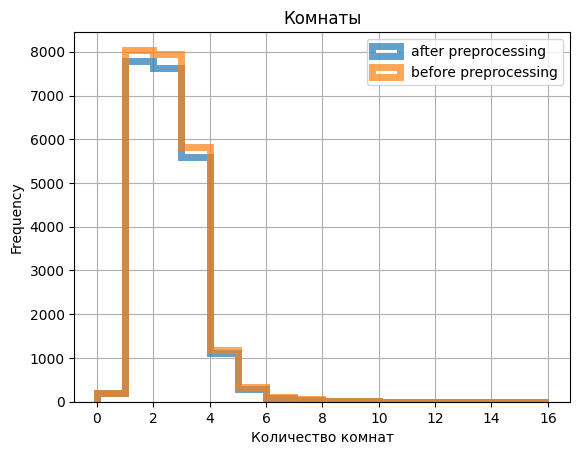

Наибольшие по числу комнат варианты:
18096    16
19997    14
618      11
9314     11
3983     10
18138    10
17396    10
19960     9
8507      9
9180      9
Name: rooms, dtype: int64


count    22749.000000
mean         2.054684
std          1.043581
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

In [83]:
# Работаем с комнатами
ax = data.plot(
    y='rooms',
    label='after preprocessing',
    kind='hist',
    histtype='step',
    bins=16,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
)
df.plot(
    y='rooms',
    label='before preprocessing',
    kind='hist',
    histtype='step',
    bins=16,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
    ax=ax,
    range=(0, 16),
)
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.show()

print('Наибольшие по числу комнат варианты:')
print(data['rooms'].sort_values(ascending=False).head(10))
data['rooms'].describe()

<Axes: ylabel='count'>

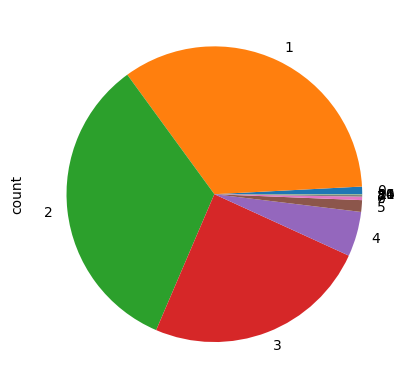

In [84]:
data.groupby('rooms')['count'].count().plot(kind='pie')

Рассматриваемый диапазон от 1 до 5 комнат, исключая некорректные значения (0 комнат) и выбросы. Большая часть планировок имеет 1,2,3, реже 4 комнаты. В сумме данные планировки занимают около 90% рынка. Среднее и медиана равны 2 комнаты. Крайне редкие значения (от 6 до 19 комнат) не оказывают существенного влияния на среднее значение.

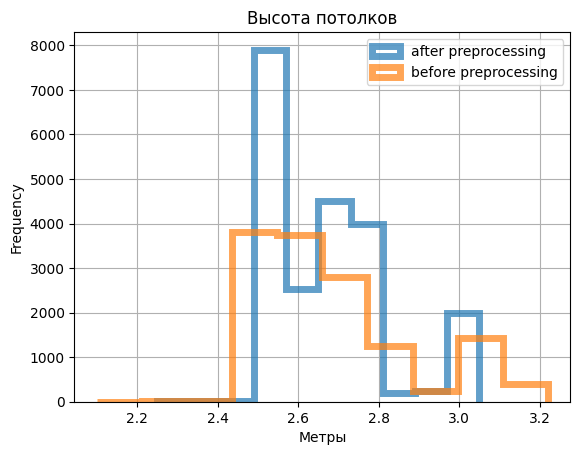

Наибольшие по высоте потолков варианты:
7222     4.45
6983     4.40
11189    4.40
4032     4.37
10324    4.30
16395    4.25
6349     4.20
6621     4.20
10689    4.20
21173    4.20
Name: ceiling_height, dtype: float64


count    22749.000000
mean         2.704433
std          0.221987
min          2.100000
25%          2.550000
50%          2.650000
75%          2.750000
max          4.450000
Name: ceiling_height, dtype: float64

In [85]:
# Работаем с потолками
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['ceiling_height'].quantile(.25) # первый квартиль Q1
q3 = data['ceiling_height'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Рассчитаем по df: Q1, Q3 и IQR, чтобы построить график без выбросов
q1_df = df['ceiling_height'].quantile(.25) # первый квартиль Q1
q3_df = df['ceiling_height'].quantile(.75) # третий квартиль Q3
iqr_df = q3_df - q1_df # межквартильный размах IQR

ax = data.plot(
    y='ceiling_height',
    label='after preprocessing',
    kind='hist',
    histtype='step',
    bins=10,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
    range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr))
)
df.plot(
    y='ceiling_height',
    label='before preprocessing',
    kind='hist',
    histtype='step',
    bins=10,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
    ax=ax,
    range=((q1_df - 1.5 * iqr_df), (q3_df + 1.5 * iqr_df))
)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.show()

print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))
data['ceiling_height'].describe()

Рассматриваем диапазон от 2,5 до 2,85 м, исключая некорректные значения и выбросы. Большинство объектов недвижимости имеют высоту потолков 2,1 м и 2,65 м. Реже представлены варианты от 2,7м до 2,85 м. Среднее 2,48 м и медиана 2,5 точны.

#### Параметры `этаж квартиры`, `тип этажа квартиры`, `общее количество этажей в доме`

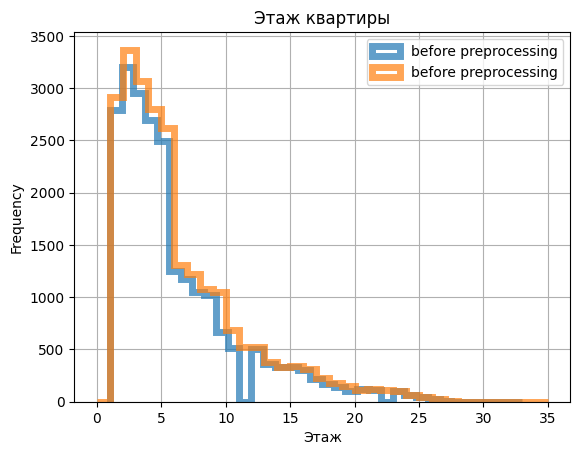

count    22749.000000
mean         5.906326
std          4.883815
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [86]:
# Работаем с этажами
ax = data.plot(
    y='floor',
    label='before preprocessing',
    kind='hist',
    histtype='step',
    bins=35,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
)
df.plot(
    y='floor',
    label='before preprocessing',
    kind='hist',
    histtype='step',
    bins=35,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
    ax=ax,
    range=(0, 35),
)
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.show()
data['floor'].describe()

Рассматриваемый диапазон с 1 по 17 этаж, исключая некорректные значения и выбросы. Большинство объектов недвижимости расположены с 1 по 4 этаж. Реже представлены варианты с 4 по 7. Среднее 5 этаж и медиана 4 этаж.

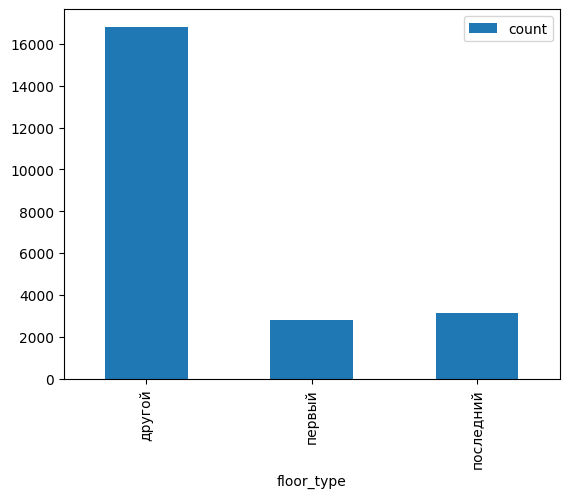

In [87]:
# Работаем с типом этажа квартиры («первый», «последний», «другой»);
dd = data.pivot_table(index='floor_type', values='count', aggfunc='count').plot(kind='bar')
#data.groupby('floor_type')['count'].count().plot(kind='pie')

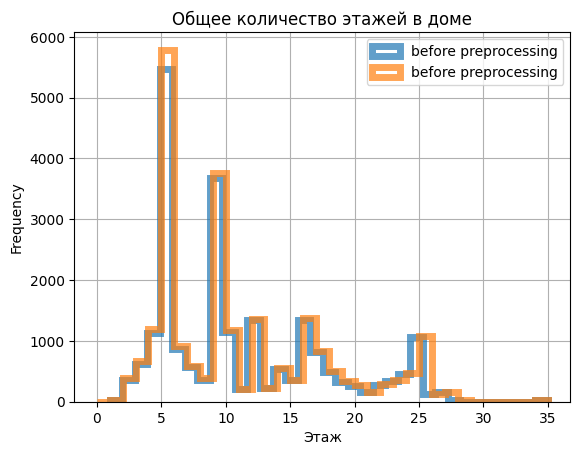

count    22749.000000
mean        10.747857
std          6.583337
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         35.000000
Name: floors_total, dtype: float64

In [88]:
# Работаем с общим количеством этажей в доме
ax = data.plot(
    y='floors_total',
    label='before preprocessing',
    kind='hist',
    histtype='step',
    bins=35,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
)
df.plot(
    y='floors_total',
    label='before preprocessing',
    kind='hist',
    histtype='step',
    bins=35,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
    ax=ax,
    range=(0, 35),
)
plt.title('Общее количество этажей в доме')
plt.xlabel('Этаж')
plt.show()
data['floors_total'].describe()

В основном на рынке преобладают серии домов с 5-ти и 9-ти этажной застройкой. Остальные варианты представлены реже. Среднее 10 этаж и медиана 9 этаж.

<Axes: xlabel='floors_total', ylabel='floor'>

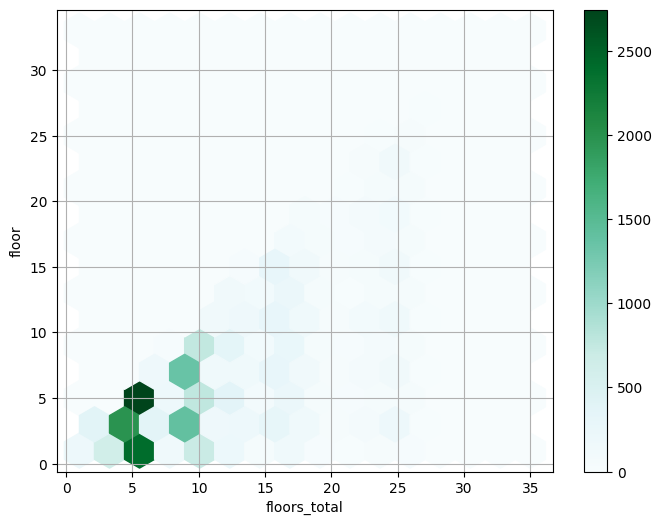

In [89]:
data.plot(x='floors_total', y='floor', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True) 

Чаще всего к продаже предлагаются 1 и 5 этажи пятиэтажных зданий.

#### Параметр `цена за квадратный метр`

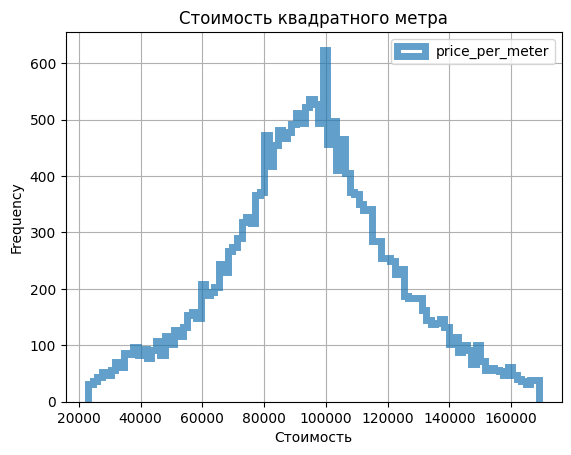

Наибольшие по цене за квадрат варианты:
4663     848484.848485
16487    848484.848485
7982     721518.987342
20388    640422.350472
5880     612557.427259
12405    590694.239291
8113     552000.000000
7412     537634.408602
11035    502425.021645
5087     468750.000000
Name: price_per_meter, dtype: float64


In [90]:
# Работаем с ценой за квадрат
# Рассчитаем по data: Q1, Q3 и IQR, чтобы построить график без выбросов
q1 = data['price_per_meter'].quantile(.25) # первый квартиль Q1
q3 = data['price_per_meter'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


data.plot(
    y='price_per_meter',
    label='price_per_meter',
    kind='hist',
    histtype='step',
    bins=100,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
    range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr))   
)
plt.title('Стоимость квадратного метра')
plt.xlabel('Стоимость')

plt.show()
print('Наибольшие по цене за квадрат варианты:')
print(data['price_per_meter'].sort_values(ascending=False).head(10))

#### Параметр `расстояние до центра города в метрах`

##### Столбец 'city_centers_nearest', расстояние до центра города в метрах

<Axes: xlabel='price_type'>

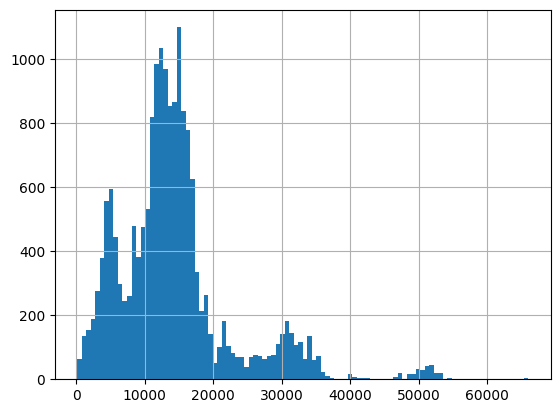

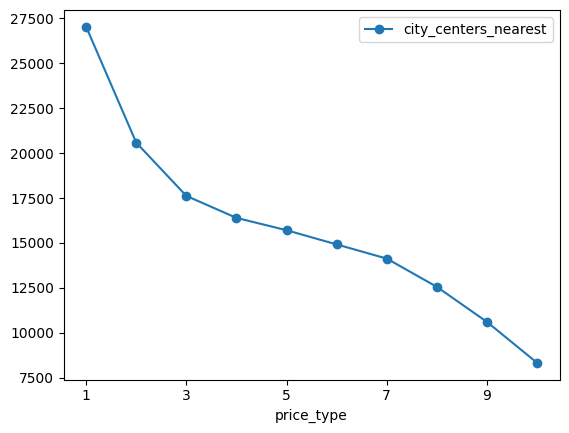

In [91]:
data.query('city_centers_nearest != -9999')['city_centers_nearest'].hist(bins=100)
data.query('city_centers_nearest != -9999').pivot_table(index='price_type', values='city_centers_nearest', aggfunc='mean').plot(style='o-')

Самое дешевое жилье - максимально далеко от центра города. И наоборот.
При этом на среднеудаленном от центра города расстоянии зависимость между ценой и расстоянием от центра ослабевает.

#### Параметр `расстояние до ближайшего аэропорта`

<Axes: xlabel='price_type'>

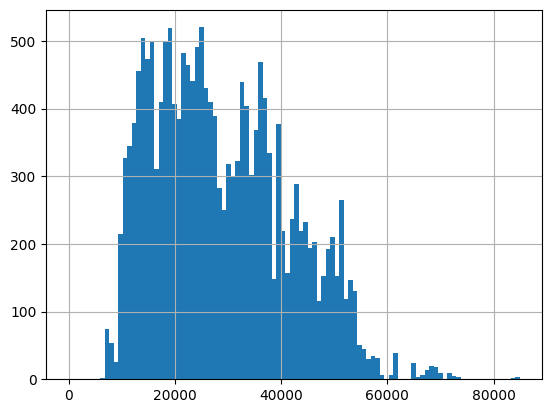

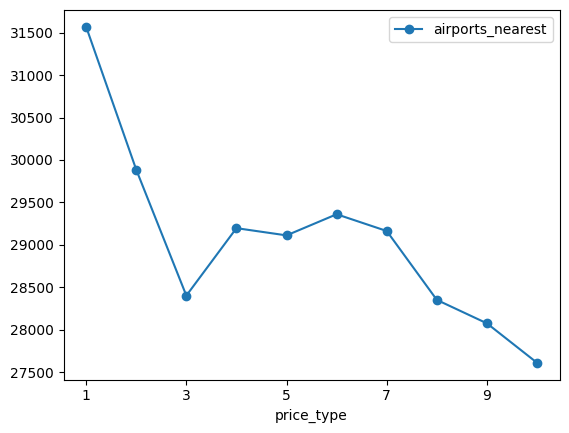

In [92]:
data.query('airports_nearest != -9999')['airports_nearest'].hist(bins=100)
data.query('city_centers_nearest != -9999').pivot_table(index='price_type', values='airports_nearest', aggfunc='mean').plot(style='o-')

Аналогичная картина и с расстоянием до ближайшего аэропорта.

#### Параметр `расстояние до ближайшего парка`

<Axes: xlabel='price_type'>

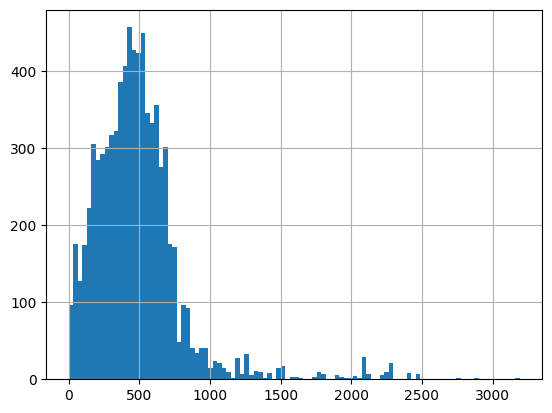

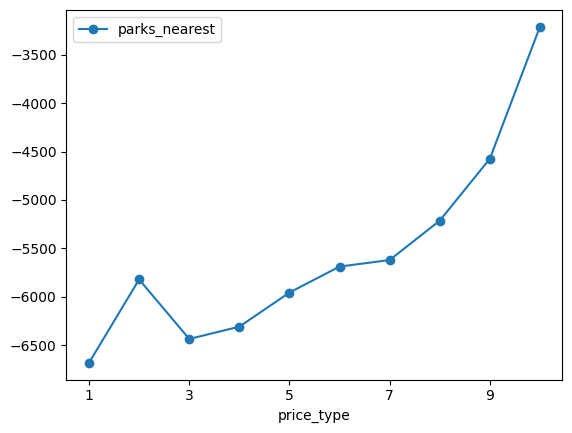

In [93]:
data.query('parks_nearest != -9999')['parks_nearest'].hist(bins=100)
data.query('city_centers_nearest != -9999').pivot_table(index='price_type', values='parks_nearest', aggfunc='mean').plot(style='o-')


А вот с расстоянием до парковых зон - картина прямо противоположная. Оно и понятно - чем дальше от центра города, тем больше парковых зон.

#### Параметр `день и месяц публикации объявления`

<Axes: >

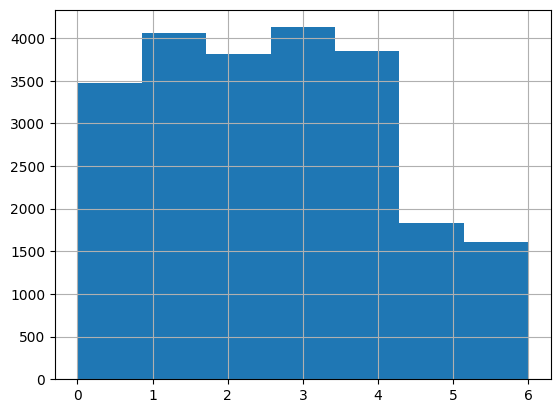

In [94]:
# Столбец 'weekday_exposition', день публикации объявления
data['weekday_exposition'].hist(bins=7)


Как правило, объявления люди размещают в будние дни.

<Axes: >

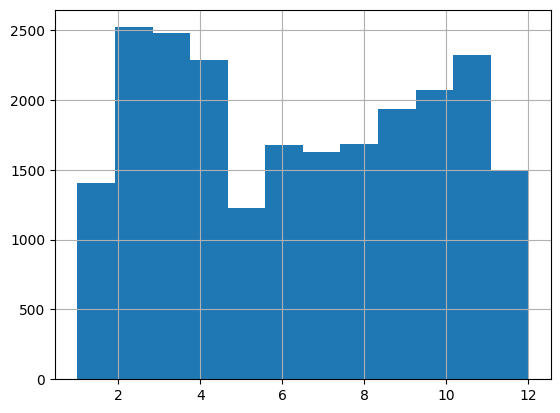

In [95]:
# Столбец 'month_exposition', месяц публикации объявления
data['month_exposition'].hist(bins=12)

В преддверии и сразу после начала года люди реже размещают объявления. Также определенный спад прослеживается в летние месяцы.

#### Вывод

- <b>Площадь</b>
Большинство квартир - менее 100 квадратных метров, больше площадь практически не встречается. В подборке есть несколько очень больших и странных вариантов с площадью более 200 квадратных метров.
- <b>Стоимость</b>
В основном стоимость квартир - порядка 5 миллионов. Больше 20 миллионов вариантов мало и они выглядят очень странно и некоторые - на порядок дороже.
- <b>Комнаты</b>
В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат выглядят странно и подозрительно. Даже при объединении нескольких квартир в одну это подозрительно. Возможно, это отдельный дом.
- <b>Высота потолков</b>
Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Больше 4 метров высота потолков выглядит подозрительно. Есть значения в 27 метров (высота 9-этажного дома) - это может быть ошибкой данных и реальная высота 2,7 метра.
- <b>Площадь кухни</b>
Самые распространённые кухни - от 5 до 15 метров. Больше 20 метров кухни практически не встречаются. Больше 30 - единичные случаи.
- <b>Жилая площадь</b>
Самые распространённые варианты с жилой площадью от 10 до 50 метров. После 80 метров встречаются единичные случаи. Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры.
- <b>Стоимость квадратного метра</b>
Имеет нормальное распределение с пиком в районе 100,000. Варианты дороже 250,000 являются единичными.

### 2. Изучение как быстро продавались квартиры (столбец `days_exposition``)

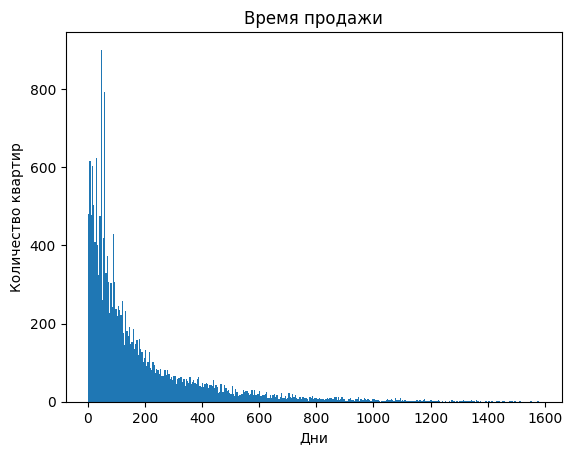

count    19686.000000
mean       182.019963
std        220.282925
min          1.000000
25%         45.000000
50%         97.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [96]:
# Гистограма времени продажи
plt.hist(data.query('days_exposition != -9999')['days_exposition'], bins=365)
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
data.query('days_exposition != -9999')['days_exposition'].describe()

На первый взгляд, форма распределения похожа на типичное распределение Пуассона.

<Axes: >

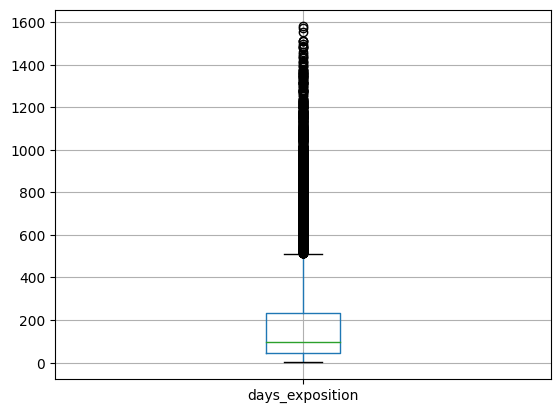

In [97]:
# Посмотрим "ящик с усами" для столбца 'days_exposition'
data.query('days_exposition > 0').loc[:,['days_exposition']].boxplot() 

<Axes: >

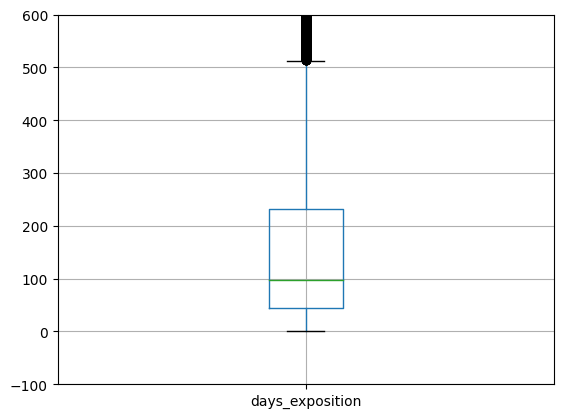

In [98]:
# Посмотрим "ящик с усами" для столбца 'days_exposition' в чуть более увеличенном масштабе:
plt.ylim(-100, 600)
data.query('days_exposition > 0').loc[:,['days_exposition']].boxplot() 

Нижний "ус" отсекает множество на уровне нуля. Это означает, что нижняя граница скорости продаж вписывается в нормальные значения. Что же касается верхней границы - всё, что касается продаж чуть выше 500 дней, является статистическими выбросами. Это "ненормальная" продолжительность продаж, и для выводов о "нормальной" продолжительности продаж такие случаи нам не нужны. От них лучше избавиться.

Сформулируем верхнюю границу выбросов чуть менее радикально. Скажем так: квартиры, которые продаются на рынке более полутора лет, являются скорее существенным отклонением от нормы по скорости продаж.

In [99]:
# Посмотрим, сколько таких квартир:
print(len(data.query('days_exposition > 0').loc[data['days_exposition'] > 365*1.5]),' из ', len(data.query('days_exposition > 0')))

1442  из  19686


Долгопродающиеся квартиры - это около 7% от общей массы объявлений. Довольно существенная доля, однако влияние на качество анализа, которое данные объекты оказывают, скорее отрицательное. Они сильно искажают на статистические показатели скорости продаж. Удалим их.

array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

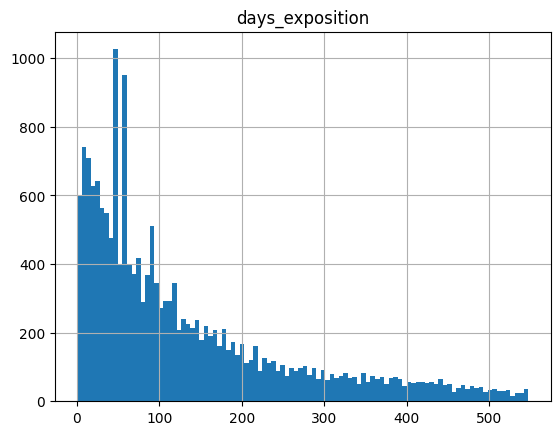

In [100]:
data_sold = data.query('days_exposition > 0').loc[data['days_exposition'] < 365*1.5]
# Посмотрим теперь на гистограмму столбца 'days_exposition'
data_sold.loc[:, ['days_exposition']].hist(bins=100)

На гистограмме есть несколько пиков, которые явно выбиваются из общего тренда. Неплохо было бы посмотреть, какие сроки продажи являются фаворитами по количеству повторений.

In [101]:
data_sold['days_exposition'].value_counts().head(10)

days_exposition
45    669
60    514
7     223
30    206
90    194
4     173
3     155
5     147
14    142
9     137
Name: count, dtype: int64

Вот это неожиданность! Наиболее частая продолжительность продаж носит слишком уж системный характер: неделя, месяц, полтора/два/три месяца. Судя по всему, это не продолжительность продажи, а некоторые сроки, в которые объявление должно было быть снято или продлено. В этот же ряд попадает, скорее всего, продолжительность продаж в 14 дней (две недели). Если это действительно так, то строки с данной продолжительностью продаж искажают информацию о реальной продолжительности размещения объявления до момента продажи. Почистим наш датасет от таких строк.

array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

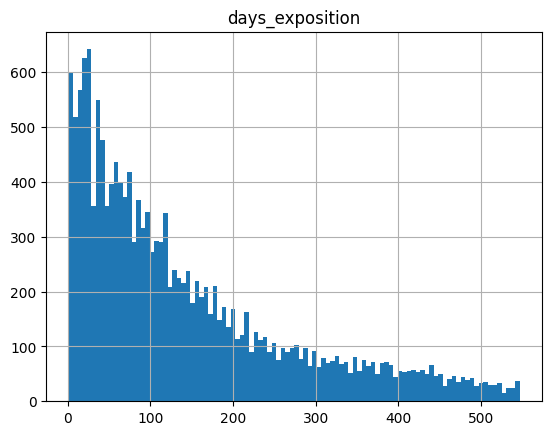

In [102]:
data_sold = data_sold.query('days_exposition not in [7, 14, 30, 45, 60, 90]')
# Посмотрим теперь на гистограмму столбца 'days_exposition'
data_sold.loc[:, ['days_exposition']].hist(bins=100)

Мы очистили наши данные от случайны и систематических ошибок и статистических выбросов и аномалий. Разобъем наш датасет на три равные части по вариативности сроков продаж:

In [103]:
data_sold['days_exposition_type'] = pd.qcut(data_sold['days_exposition'], q=3, labels=['быстро','нормально','медленно'], precision=0, duplicates='drop')
data_sold.pivot_table(index='days_exposition_type', values='days_exposition', aggfunc='max')

,days_exposition
days_exposition_type,
быстро,61
нормально,162
медленно,547


In [104]:
data_sold.query('days_exposition != -9999')['days_exposition'].describe()

count    16296.000000
mean       143.820631
std        130.377935
min          1.000000
25%         42.000000
50%        102.000000
75%        207.000000
max        547.000000
Name: days_exposition, dtype: float64

#### Вывод

Медианное время продажи - 102 дней. Среднее время продажи - 143 день.
Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Рынок недвижимости - весьма консервативный. Продажа квартиры в течении двух месяцев считается быстрой; нормальной продолжительностью продажи является срок от двух до шести месяцев; от полугода до полутора лет - долго, но в пределах нормы. Однако, имеются случаи, когда объект недвижимости продается и более полутора лет. Такие случаи на рынке недвижимости являются отклонением от общего правила, но также встречаются на практике.

### 3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Чтобы визуально оценить наличие связи между ценой объекта недвижимости и каждым из факторов, воспользуемся библиотекой seaborn и красивым графиком heatmap.

In [105]:
#Запишем перечень факторов в переменную `corr_param`.
#Первой укажем цену, тогда первый столбец матрицы покажет нам цависимость цены от каждого из факторов.
corr_param =(['last_price',# цена объекта
       'total_area',# общая площадь
       'living_area',# жилая площадь
       'kitchen_area',# площадь кухни
       'rooms'# количество комнат
      ])

In [106]:
# Получаем матрицу корреляции
corr_matrix = data[corr_param].corr()
# Выведем на экран
display(corr_matrix)

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.780237,0.689541,0.616438,0.507094
total_area,0.780237,1.000000,0.938444,0.613856,0.795509
living_area,0.689541,0.938444,1.000000,0.420093,0.864242
kitchen_area,0.616438,0.613856,0.420093,1.000000,0.286459
rooms,0.507094,0.795509,0.864242,0.286459,1.000000


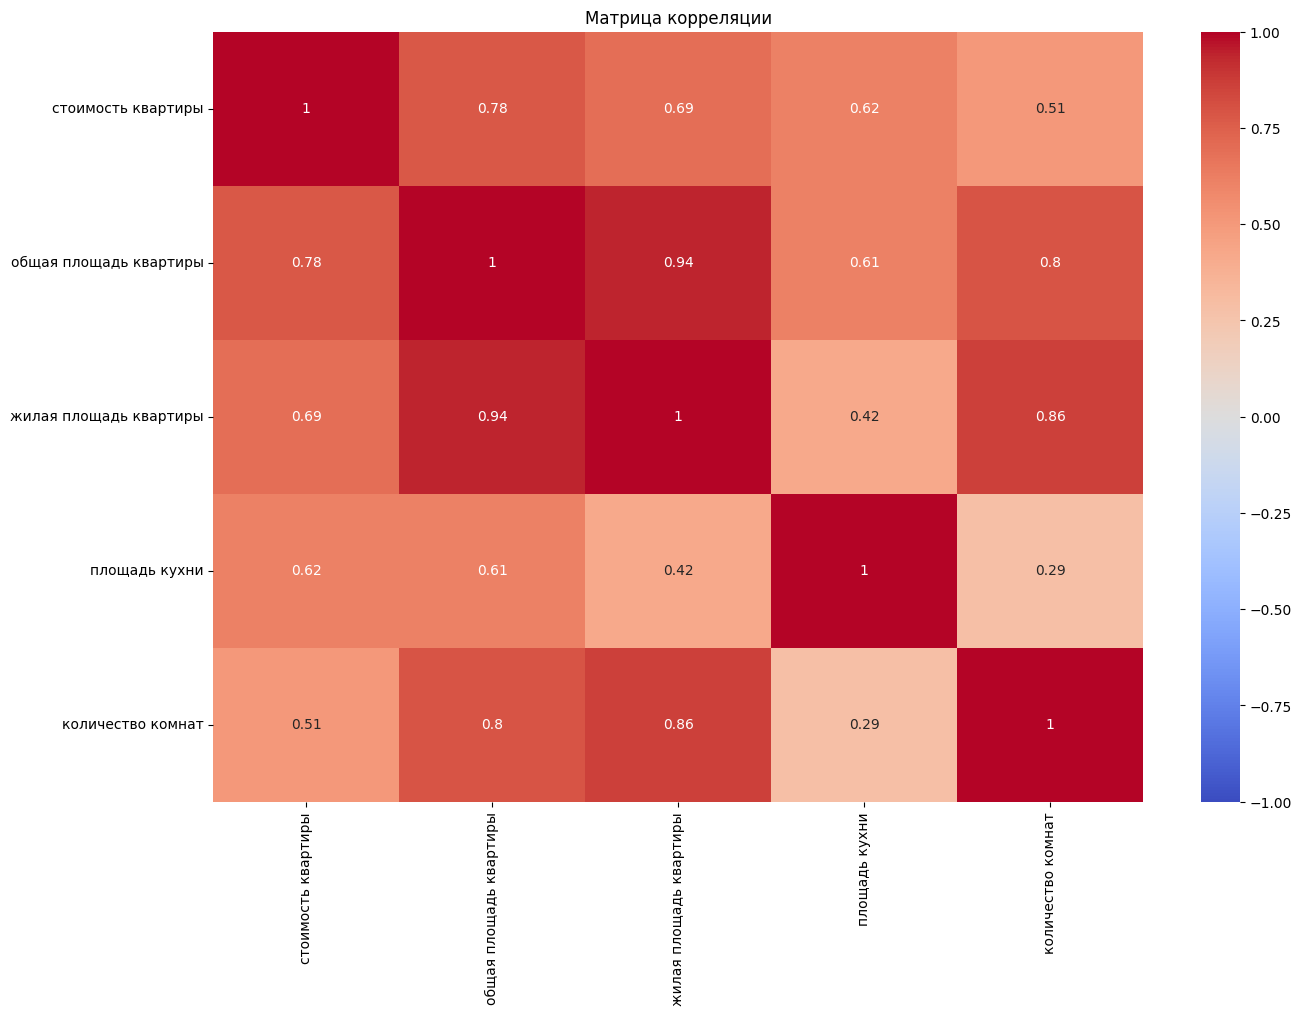

In [107]:
# Список с названиями параметров
corr_labels = ['стоимость квартиры',
    'общая площадь квартиры',
    'жилая площадь квартиры',
    'площадь кухни',
    'количество комнат',
    ]

# Визуализируем матрицу корреляции
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=corr_labels,
            xticklabels=corr_labels)
plt.title('Матрица корреляции')
plt.show()

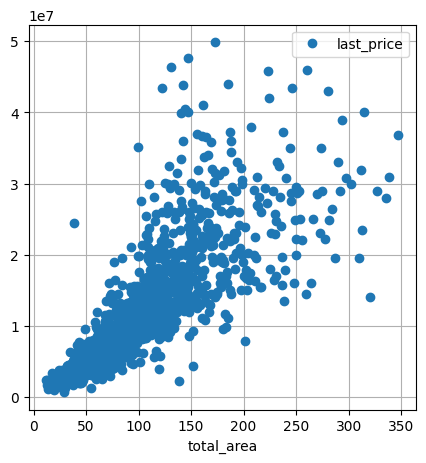

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.780237
total_area    0.780237    1.000000 



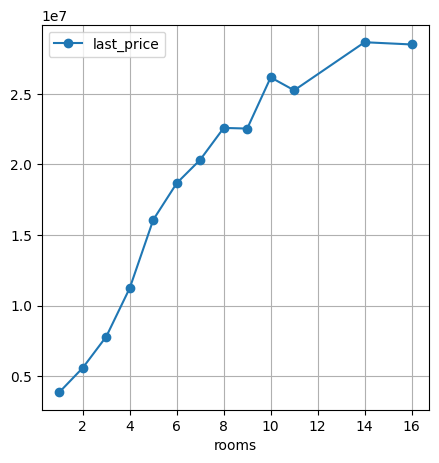

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.506046
rooms         0.506046  1.000000 



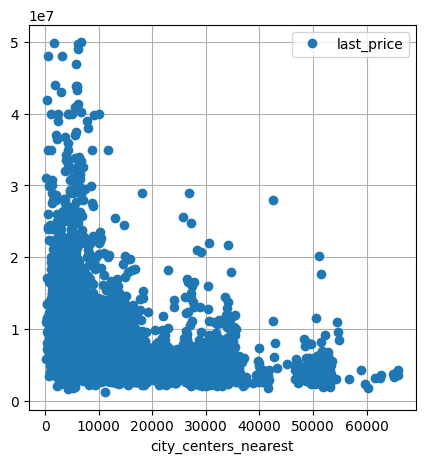

Корреляция цены и удалённости от центра: 

                      city_centers_nearest  last_price
city_centers_nearest              1.000000    0.061134
last_price                        0.061134    1.000000 



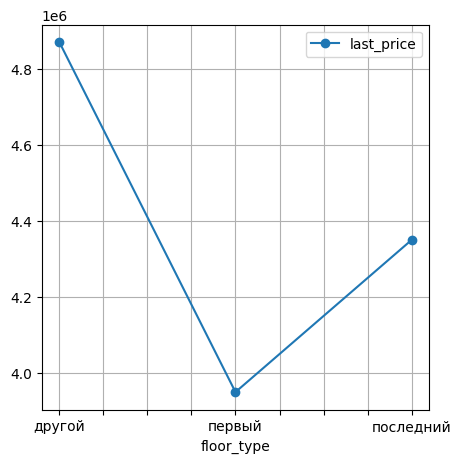

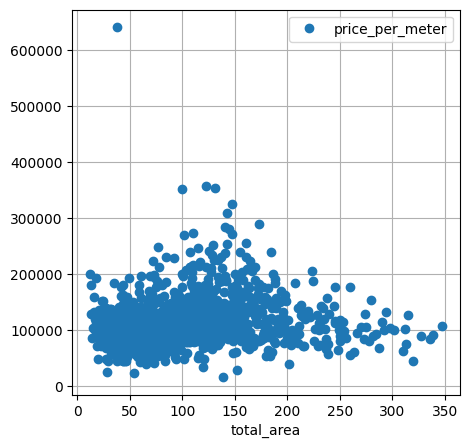

Корреляция цены за квадрат и площади: 

                 price_per_meter  total_area
price_per_meter         1.000000    0.182582
total_area              0.182582    1.000000 



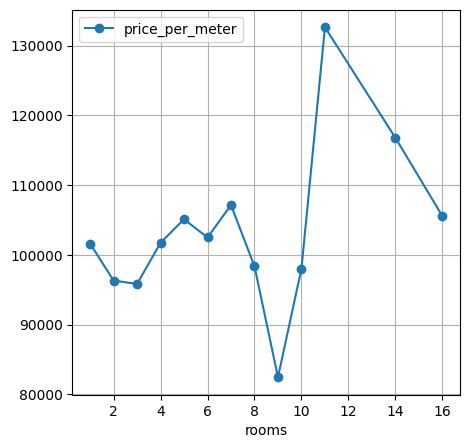

Корреляция цены за квадрат и числа комнат: 

                 price_per_meter     rooms
price_per_meter         1.000000 -0.025136
rooms                  -0.025136  1.000000 



In [108]:
# Зависимость цены от площади
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='index', values=['total_area', 'last_price']).corr(),'\n')

# Зависимость цены от числа комнат
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='index', values=['rooms', 'last_price']).corr(),'\n')

# Зависимость цены от удалённости от центра
(
    data.query('city_centers_nearest != -9999').pivot_table(index='city_centers_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(data.pivot_table(index='index', values=['city_centers_nearest', 'last_price']).corr(),'\n')

# Зависимость цены от этажа
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

# Зависимость цены за квадрат от площади
(
    data.pivot_table(index='total_area', values='price_per_meter')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и площади:','\n')
print(data.pivot_table(index='index', values=['total_area', 'price_per_meter']).corr(),'\n')

# Зависимость цены за квадрат от числа комнат
(
    data.query('rooms > 0').pivot_table(index='rooms', values='price_per_meter')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='index', values=['rooms', 'price_per_meter']).corr(),'\n')

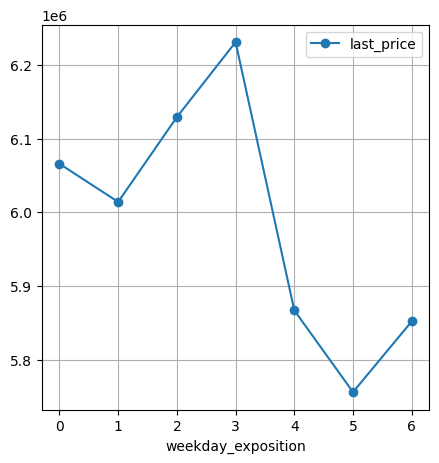

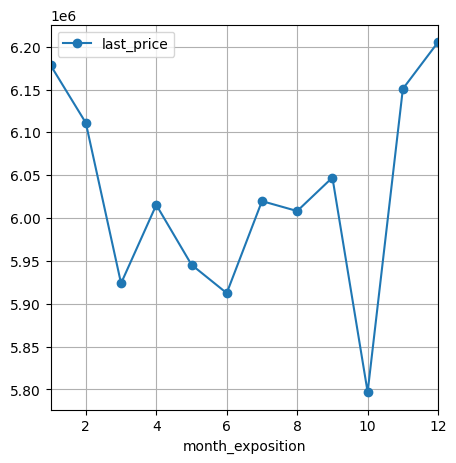

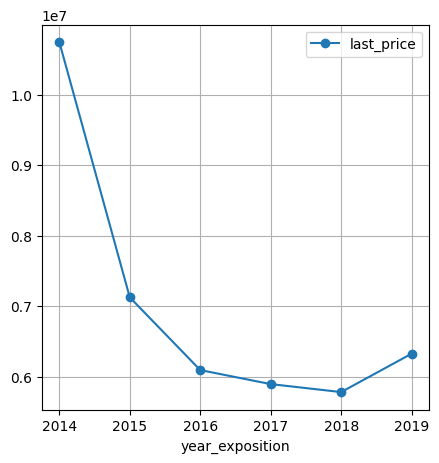

In [109]:
# Зависимость от дня размещения
(
    data.pivot_table(index='weekday_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

# Зависимость от месяца размещения
(
    data.pivot_table(index='month_exposition', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(5, 5))
)
plt.show()

# Зависимость от года размещения
(
    data.pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Как видно, первые три фактора (общая площадь, жилая площадь, площадь кухни) оказывают значительное влияние на цену. Общая и жилая площадь, помимо этого, тесно связаны между собой (что вполне логично).

Количество комнат также оказывает влияние на цену, хотя заметно менее существенное.

Самые дорогие варианты квартир находятся в центре города, однако в центре также есть и достаточно дешёвые варианты.

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле.

Чуть дороже последний этаж.

Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

Цена за квадрат выше у однокомнатных квартир и квартир с 4 и 5 комнатами. Последнее, вероятно, объясняется элитностью недвижимости.

### Вывод

- На цену объекта недвижимости оказывает существенное влияние его общая площадь. Влияние, которое оказывают прочие характеристики объекта недвижимости (жилая площадь, площадь кухни, количество комнат) является следствием того, что между данными факторами и общей площадью существует прямая корреляция, а поэтому они показывают также корреляцию и с ценой.
- Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле.
- Самые дорогие варианты квартир находятся в центре города, однако в центре также есть и достаточно дешёвые варианты.
- Между стоимостью квартиры и днем недели, месяцем или годом размещения объявления отсутствует линейная связь.

### Какова средняя цена за кв. м по топ 10 населенным пунктам

Найдем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Для этого выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Эти данные можно найти по имени в столбце `locality_name_std`.

In [110]:
#ТОП 10 населенных пунктов с наибольшим числом объявлений
top_10_localities = data['locality_name_std'].value_counts().head(10)
top_10_localities

locality_name_std
санкт-петербург      15446
посёлок мурино         492
посёлок шушары         438
всеволожск             371
пушкин                 364
колпино                338
посёлок парголово      327
гатчина                292
деревня кудрово        262
петергоф               201
Name: count, dtype: int64

In [111]:
# Выведем среднюю цену за кв м по топ 10 населенным пунктам
top_10_localities_pivot = data.query('locality_name_std in @top_10_localities.index').pivot_table(index='locality_name_std', values='price_per_meter')
top_10_localities_pivot.sort_values(by='price_per_meter', ascending=False)

,price_per_meter
locality_name_std,
санкт-петербург,112073.997836
пушкин,102929.680628
деревня кудрово,92702.184418
посёлок парголово,90175.913458
посёлок мурино,86308.320783
петергоф,84757.559690
посёлок шушары,78561.735743
колпино,75424.579098
всеволожск,68880.131023


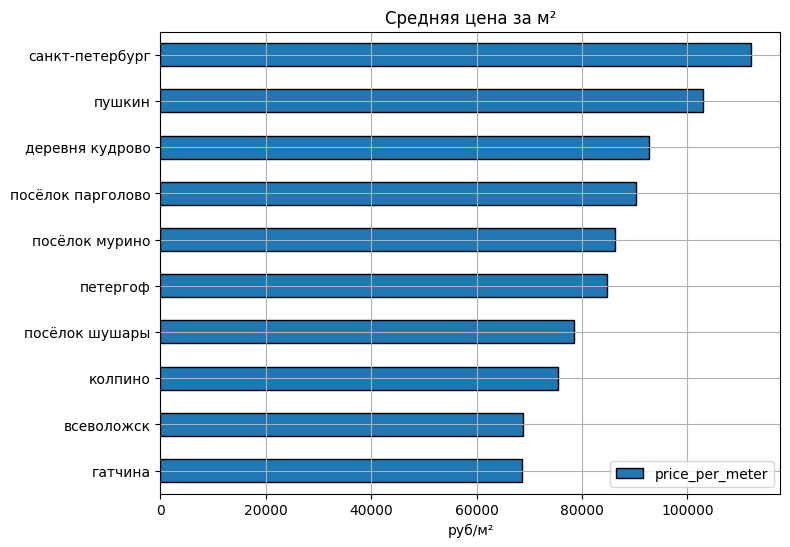

In [112]:
# Отобразим на графике среднюю цену квадратного метра в топ 10 населенных пунктах
top_10_localities_pivot.sort_values(by='price_per_meter').plot(kind='barh', legend=True, grid=True, ec='black', figsize=(8, 6))

plt.title('Средняя цена за м²')
plt.xlabel('руб/м²')
plt.ylabel('')
plt.show()

Из графика видно, что наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге(111722 руб.), что логично. Следом по стоимости идет Пушкин (101894 руб.), что тоже логично - много исторических мест, парков и расположен к городу ближе, чем, например, Гатчина. Наименьшая цена за квадратный метр в Гатчине (57011 руб.).*

Определим самую высокую и самую низкую цену квадратного метра, усредненную по каждому населенному пункту:

In [113]:
min_price = data.groupby('locality_name_std')['price_per_meter'].mean().min()
max_price = data.groupby('locality_name_std')['price_per_meter'].mean().max()

Посмотрим, в каком населенном пункте самые низкие цены на недвижимость:

In [114]:
data.pivot_table(index='locality_name_std', values='price_per_meter', aggfunc='mean').query('price_per_meter == @min_price')

,price_per_meter
locality_name_std,
деревня старополье,10368.663594


Посмотрим, в каком населенном пункте самые высокие цены на недвижимость:

In [115]:
data.pivot_table(index='locality_name_std', values='price_per_meter', aggfunc='mean').query('price_per_meter == @max_price')

,price_per_meter
locality_name_std,
зеленогорск,115122.799198


### Вывод

Как и следовало ожидать, лидером по количеству объявлений является основная агломерация - Санкт-Петербург.
Минимальные цены обнаружены в деревне Ставрополье, а максимальные - оказался Зеленогорск.

#### Как стоимость объектов зависит от расстояния до центра города

Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name_std и вычислим среднюю цену каждого километра.

In [116]:
# выберем только Санкт-Петербург
df_spb = data.query('locality_name == "Санкт-Петербург"')
df_spb.head()

,index,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_ismissing,floors_total_ismissing,living_area_ismissing,is_apartment_ismissing,kitchen_area_ismissing,balcony_ismissing,locality_name_ismissing,airports_nearest_ismissing,city_centers_nearest_ismissing,parks_around3000_ismissing,parks_nearest_ismissing,ponds_around3000_ismissing,ponds_nearest_ismissing,days_exposition_ismissing,num_missing,locality_name_std,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km,count,price_type
0,0,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482.0,2,755.0,-9999,False,False,False,True,False,True,False,False,False,False,False,False,False,True,3,санкт-петербург,120370.370370,3,3,2019,другой,16.0,1,10
2,2,5196000.0,56.0,2015-08-20,2,2.55,5,34.300000,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90.0,2,574.0,558,True,False,False,True,False,False,False,False,False,False,False,False,False,False,2,санкт-петербург,92785.714286,3,8,2015,другой,14.0,1,6
3,4,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112.0,1,48.0,121,False,False,False,True,False,True,False,False,False,False,False,False,False,False,2,санкт-петербург,100000.000000,1,6,2018,другой,8.0,1,9
6,7,7915000.0,71.6,2019-04-18,2,2.75,24,41.307692,22,False,False,False,18.9,2,Санкт-Петербург,23982,11634,0,-9999.0,0,-9999.0,-9999,True,False,True,True,False,False,False,False,False,False,True,False,True,True,6,санкт-петербург,110544.692737,3,4,2019,другой,12.0,1,9
8,9,5400000.0,61.0,2017-02-26,3,2.50,9,43.600000,7,False,False,False,6.5,2,Санкт-Петербург,50898,15008,0,-9999.0,0,-9999.0,289,False,False,False,True,False,False,False,False,False,False,True,False,True,False,3,санкт-петербург,88524.590164,6,2,2017,другой,15.0,1,7


In [117]:
# посмотрим длину получившегося df
len(df_spb)

15446

15446 Объявлений из Санкт-Петербурга. Определим центр с помощью стоимости квадратного метра. Построим график. Та точка, после которой пойдет явный спад в стоимости и будем считать за границы центра города.

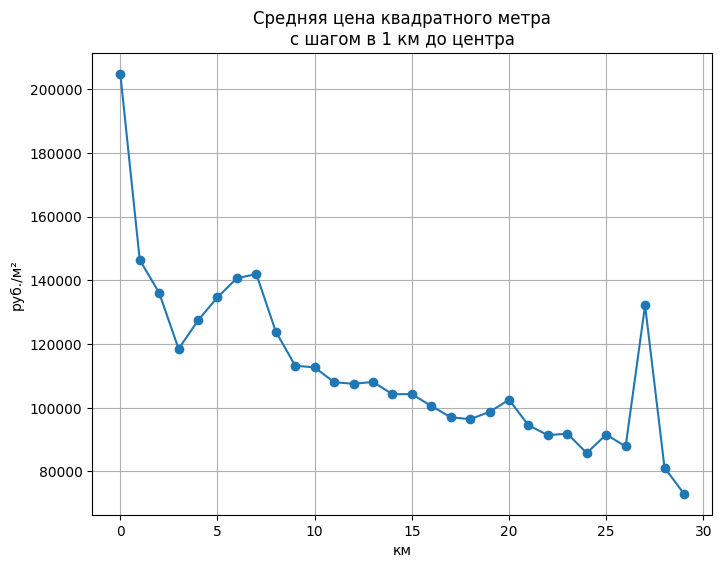

In [118]:
# Рассчитаем среднюю цену квадратного метра до центра
(
df_spb.query('city_centers_nearest_km != -9999')
    .pivot_table(index='city_centers_nearest_km', values='price_per_meter')
    .plot(marker='o', grid=True, figsize=(8, 6), legend=False)
)
plt.title('Средняя цена квадратного метра\nс шагом в 1 км до центра')
plt.xlabel('км')
plt.ylabel('руб./м²')
plt.show()

#### Вывод

Из графика можно заметить, что после 8-го километра форма графика становится линейной и стоимость начинается уменьшаться. Максимальная стоимость в зоне у самого центра(до 1 км). Пик в районе 27 км - возможен из-за класса жилья - элитное.*

## Общий вывод

### Факторы, влияющие на стоимость
*Наибольшее влияние на стоимость квартиры оказывает её площадь.* Чем больше площадь квартиры, тем выше её стоимость. Также на стоимость квартиры влияет и количество комнат. Чем больше комнат, тем выше стоимость. На стоимость квартиры также влияет расстояние до центра города. Чем ближе квартира располагается к центру, тем выше ее стоимость. По результатам исследования приняли, что зона центра города распространяется на 8 км.

### Факторы, влияющие на стоимость в центре Санкт-Петербурга
В центре города практически нет разницы, насколько квартира удалена от условного центра города.
В центре есть очень дорогие квартиры, однако в центре также есть и достаточно дешёвые варианты.

*Мы получили представление о типичном объекте недвижимости:* квартира с 1 или 2 комнатами, 5-ти или 9-ти этажка (с квартирой с 1 по 4 этаж), общей площадью около 45 м², площадью кухни около 5,5 м², с высотой потолков 2,6 м, стоимостью около 3.5 млн.руб, расположенной на удалении от центра на расстоянии 11-16 км, от аэропорта на расстоянии 15-25 км, до ближайшего парка около 500 метров.

### Срок продажи квартиры
Чаще всего квартиру продают за 102 дней. Если меньше 61 дней, то это быстро, если дольше 547 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.

<b>Ожидаемое время продажи объекта недвижимости</b> - от 61 до 547 дня.<br>
<b>Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге</b> - 112074 руб./м² (топ-10 населенных пунктов по количеству объявлений).<br>
<b>Самая низкая средняя стоимость квадратного метра в Гатчина</b> - 68627 руб./м² (топ-10 населенных пунктов по количеству объявлений).<br>

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод